# Feature Engineering and Model Building

In [345]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [346]:
df = pd.read_csv('Data/train.csv')
X_test=pd.read_csv('Data/test.csv')

In [347]:
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [348]:
df.shape

(136429, 14)

### Data Cleaning & Feature Engineering

In [349]:
def replace_spaces_with_underscore(column_labels):
    return [label.replace(' ', '_') for label in column_labels]

df.columns=replace_spaces_with_underscore(df.columns)

X_test.columns=replace_spaces_with_underscore(X_test)

In [350]:
import re
def remove_special_characters(feature_names):
    # Define the regular expression pattern to match special characters
    pattern = r'[^\w\s]'
    
    # Initialize a list to store the cleaned feature names
    cleaned_feature_names = []
    
    # Iterate through each feature name and remove special characters
    for name in feature_names:
        cleaned_name = re.sub(pattern, '', name)
        cleaned_feature_names.append(cleaned_name)
    
    return cleaned_feature_names

df.columns=remove_special_characters(df.columns)
X_test.columns=remove_special_characters(X_test.columns)

In [351]:
df.columns

Index(['id', 'Product_ID', 'Type', 'Air_temperature_K',
       'Process_temperature_K', 'Rotational_speed_rpm', 'Torque_Nm',
       'Tool_wear_min', 'Machine_failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [352]:
df.isna().sum()

id                       0
Product_ID               0
Type                     0
Air_temperature_K        0
Process_temperature_K    0
Rotational_speed_rpm     0
Torque_Nm                0
Tool_wear_min            0
Machine_failure          0
TWF                      0
HDF                      0
PWF                      0
OSF                      0
RNF                      0
dtype: int64

In [353]:
df.dtypes

id                         int64
Product_ID                object
Type                      object
Air_temperature_K        float64
Process_temperature_K    float64
Rotational_speed_rpm       int64
Torque_Nm                float64
Tool_wear_min              int64
Machine_failure            int64
TWF                        int64
HDF                        int64
PWF                        int64
OSF                        int64
RNF                        int64
dtype: object

In [354]:
df.drop(columns='id',axis=1,inplace=True)

In [355]:
target_col = 'Machine_failure'

num_cols = [
    'Air_temperature_K',
    'Process_temperature_K',
    'Rotational_speed_rpm',
    'Torque_Nm',
    'Tool_wear_min'
]
binary_cols = [
    'TWF',
    'HDF',
    'PWF',
    'OSF',
    'RNF'
]

cat_cols=['Product_ID', 'Type']

### Numerical Columns

In [356]:
num_cols

['Air_temperature_K',
 'Process_temperature_K',
 'Rotational_speed_rpm',
 'Torque_Nm',
 'Tool_wear_min']

**Functions for Graph**

In [357]:

def plot_histogram_column(column_name,dataframe=df):
    """
    Function to plot a histogram for a specific column in the given DataFrame.

    Parameters:
    dataframe (pandas.DataFrame): The DataFrame containing the data.
    column_name (str): The name of the column for which the histogram will be plotted.

    Returns:
    None
    """
    # Check if the column_name exists in the DataFrame
    if column_name not in dataframe.columns:
        print(f"Error: Column '{column_name}' not found in the DataFrame.")
        return

    # Create the histogram
    plt.figure(figsize=(8, 6))
    plt.hist(dataframe[column_name], bins=20, color='skyblue', edgecolor='black')
    
    # Customize the plot
    plt.xlabel(column_name.capitalize())
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column_name.capitalize()}')
    
    # Show the plot
    plt.show()

In [358]:
def plot_histograms(column_names, dataframe=df):
    """
    Function to plot histograms for specific columns in the given DataFrame.

    Parameters:
    dataframe (pandas.DataFrame): The DataFrame containing the data.
    column_names (list): List of column names for which the histograms will be plotted.

    Returns:
    None
    """
    num_plots = len(column_names)
    num_rows = (num_plots + 2) // 3  # Calculate the number of rows needed
    num_cols = min(num_plots, 3)     # Maximum 3 columns per row

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
    axs = axs.ravel()  # Flatten the 2D array of subplots

    for i, column_name in enumerate(column_names):
        # Check if the column_name exists in the DataFrame
        if column_name not in dataframe.columns:
            print(f"Error: Column '{column_name}' not found in the DataFrame.")
            continue

        # Create the histogram
        axs[i].hist(dataframe[column_name], bins=20, color='skyblue', edgecolor='black')
        axs[i].set_xlabel(column_name.capitalize())
        axs[i].set_ylabel('Frequency')
        axs[i].set_title(f'Histogram of {column_name.capitalize()}')

    # Hide any remaining empty subplots
    for j in range(num_plots, num_rows * num_cols):
        axs[j].axis('off')

    plt.tight_layout()
    plt.show()

In [359]:
def plot_boxplots(column_names,dataframe=df ):
    """
    Function to plot box plots for specific columns in the given DataFrame.

    Parameters:
    dataframe (pandas.DataFrame): The DataFrame containing the data.
    column_names (list): List of column names for which the box plots will be plotted.

    Returns:
    None
    """
    # Create a figure and axes for the subplots
    num_plots = len(column_names)
    num_rows = (num_plots + 2) // 3  # Calculate the number of rows needed
    num_cols = min(num_plots, 3)     # Maximum 3 columns per row

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
    axs = axs.ravel()  # Flatten the 2D array of subplots

    for i, column_name in enumerate(column_names):
        # Check if the column_name exists in the DataFrame
        if column_name not in dataframe.columns:
            print(f"Error: Column '{column_name}' not found in the DataFrame.")
            continue

        # Create the box plot
        axs[i].boxplot(dataframe[column_name])
        axs[i].set_xlabel(column_name.capitalize())
        axs[i].set_ylabel('Value')
        axs[i].set_title(f'Box Plot of {column_name.capitalize()}')

    # Hide any remaining empty subplots
    for j in range(num_plots, num_rows * num_cols):
        axs[j].axis('off')

    plt.tight_layout()
    plt.show()

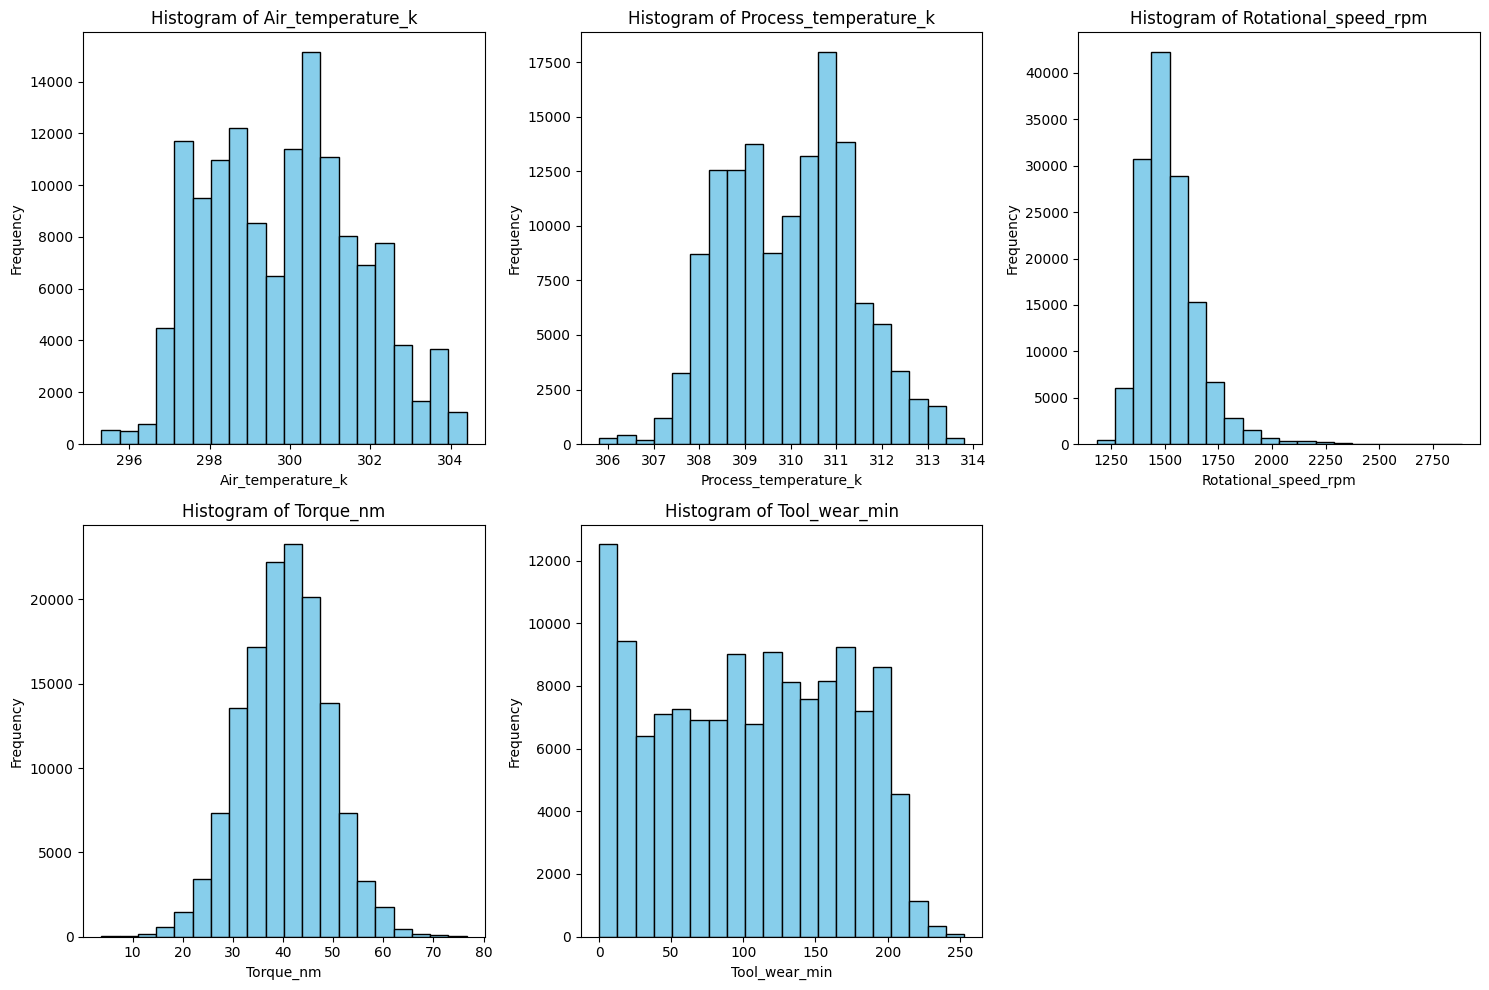

In [360]:
plot_histograms(column_names=num_cols)

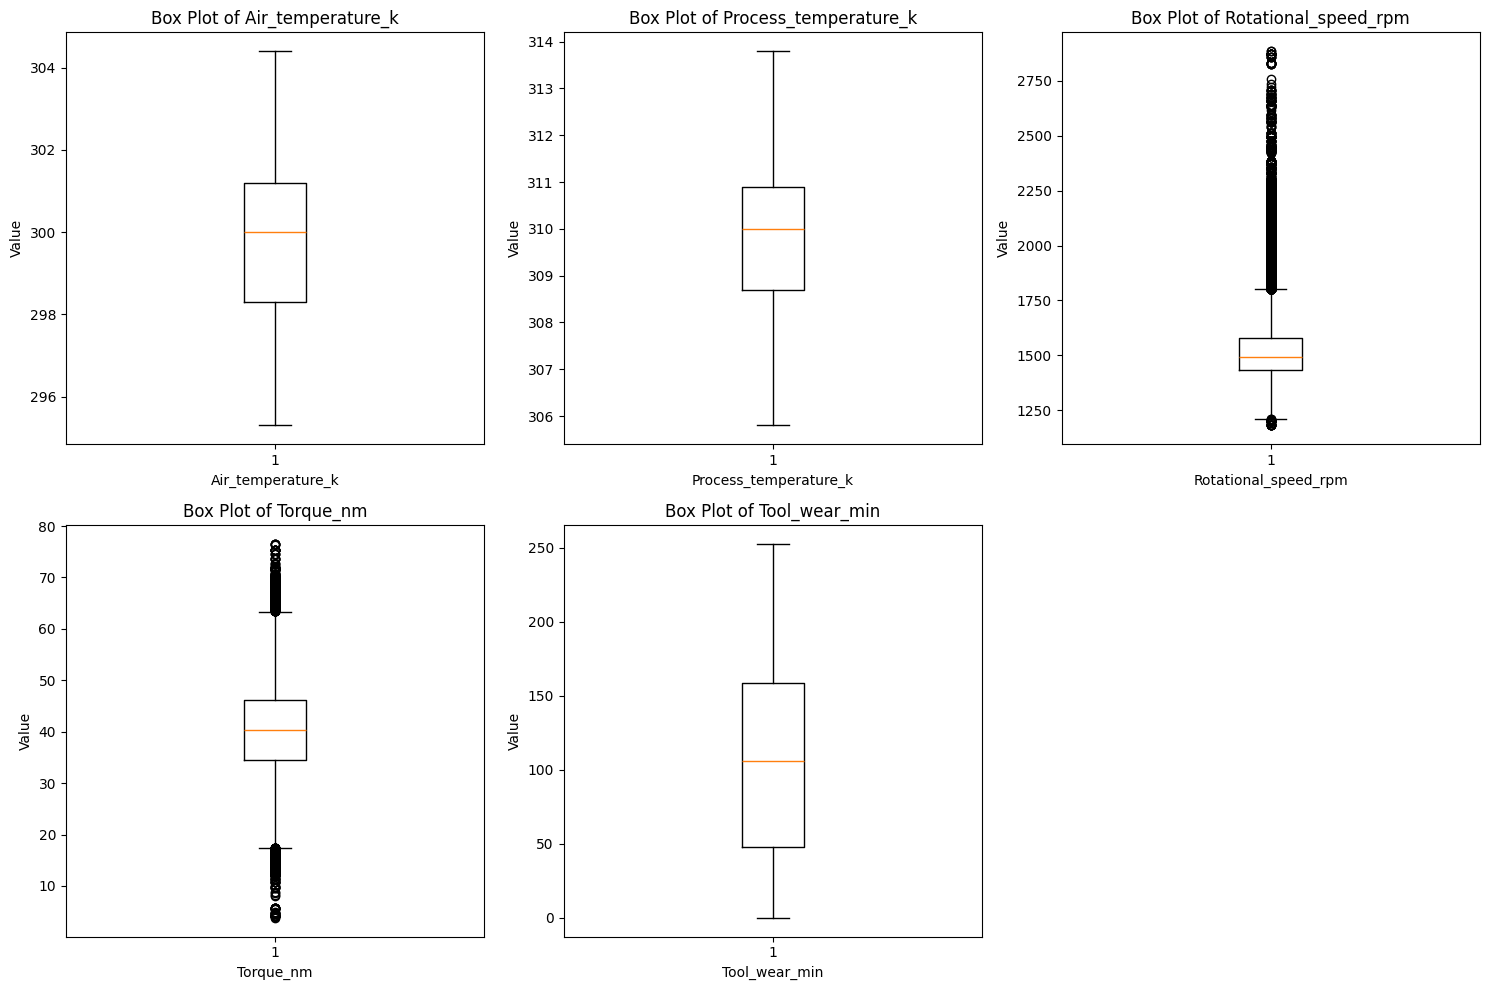

In [361]:
plot_boxplots(column_names=num_cols)

**Functions to Creating New Features**

In [362]:
def create_features(df=df):
    
    # Create a new feature by divided 'Air temperature' from 'Process temperature'
    df["Temperature_ratio"] = df['Process_temperature_K'] / df['Air_temperature_K']
    
    # Create a new feature by multiplying 'Torque' and 'Rotational speed'
    df['Torque * Rotational_speed'] = df['Torque_Nm'] * df['Rotational_speed_rpm']

    # Create a new feature by multiplying 'Torque' by 'Tool wear'
    df['Torque * Tool wear'] = df['Torque_Nm'] * df['Tool_wear_min']

    # Create a new feature by multiplying 'Torque' by 'Rotational speed'
    df['Torque * Rotational_speed'] = df['Torque_Nm'] * df['Rotational_speed_rpm']
    
    return df

In [363]:
df=create_features()
X_test=create_features(df=X_test)

In [364]:
new_Features=['Temperature_ratio','Torque * Rotational_speed','Torque * Tool wear','Torque * Rotational_speed']

In [365]:
df.head()

,Product_ID,Type,Air_temperature_K,Process_temperature_K,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,Machine_failure,TWF,HDF,PWF,OSF,RNF,Temperature_ratio,Torque * Rotational_speed,Torque * Tool wear
0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0,1.029940,57615.6,5054.0
1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0,1.031395,51186.9,5820.0
2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0,1.030738,47832.5,662.5
3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0,1.032890,67513.2,8727.1
4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0,1.036913,58091.4,1203.6


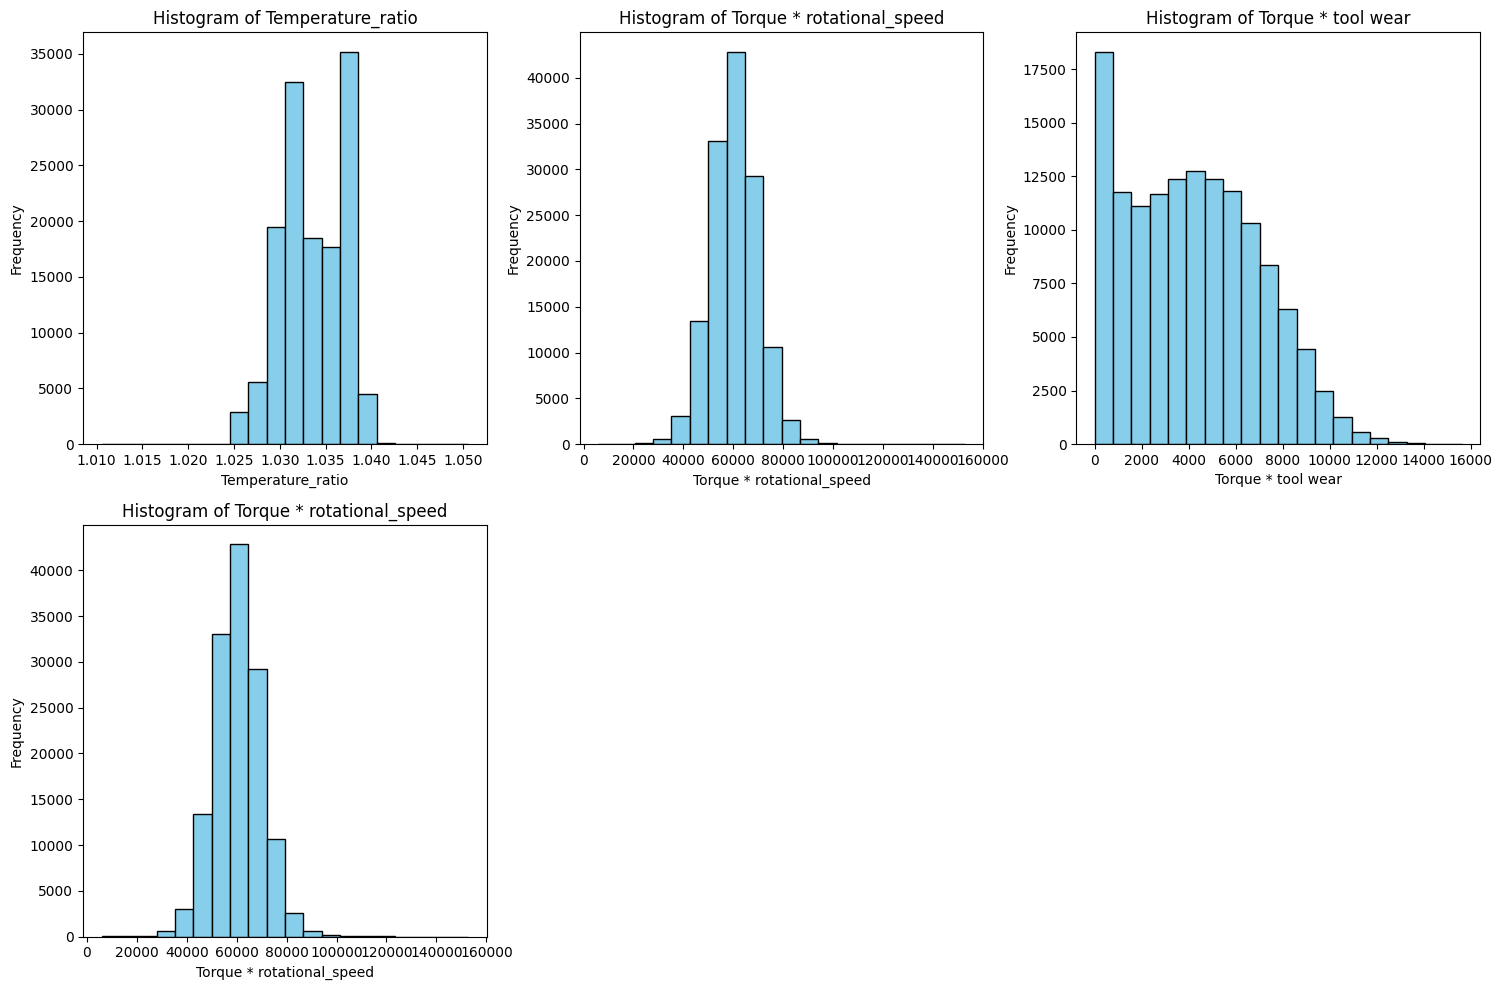

In [366]:
plot_histograms(column_names=new_Features)

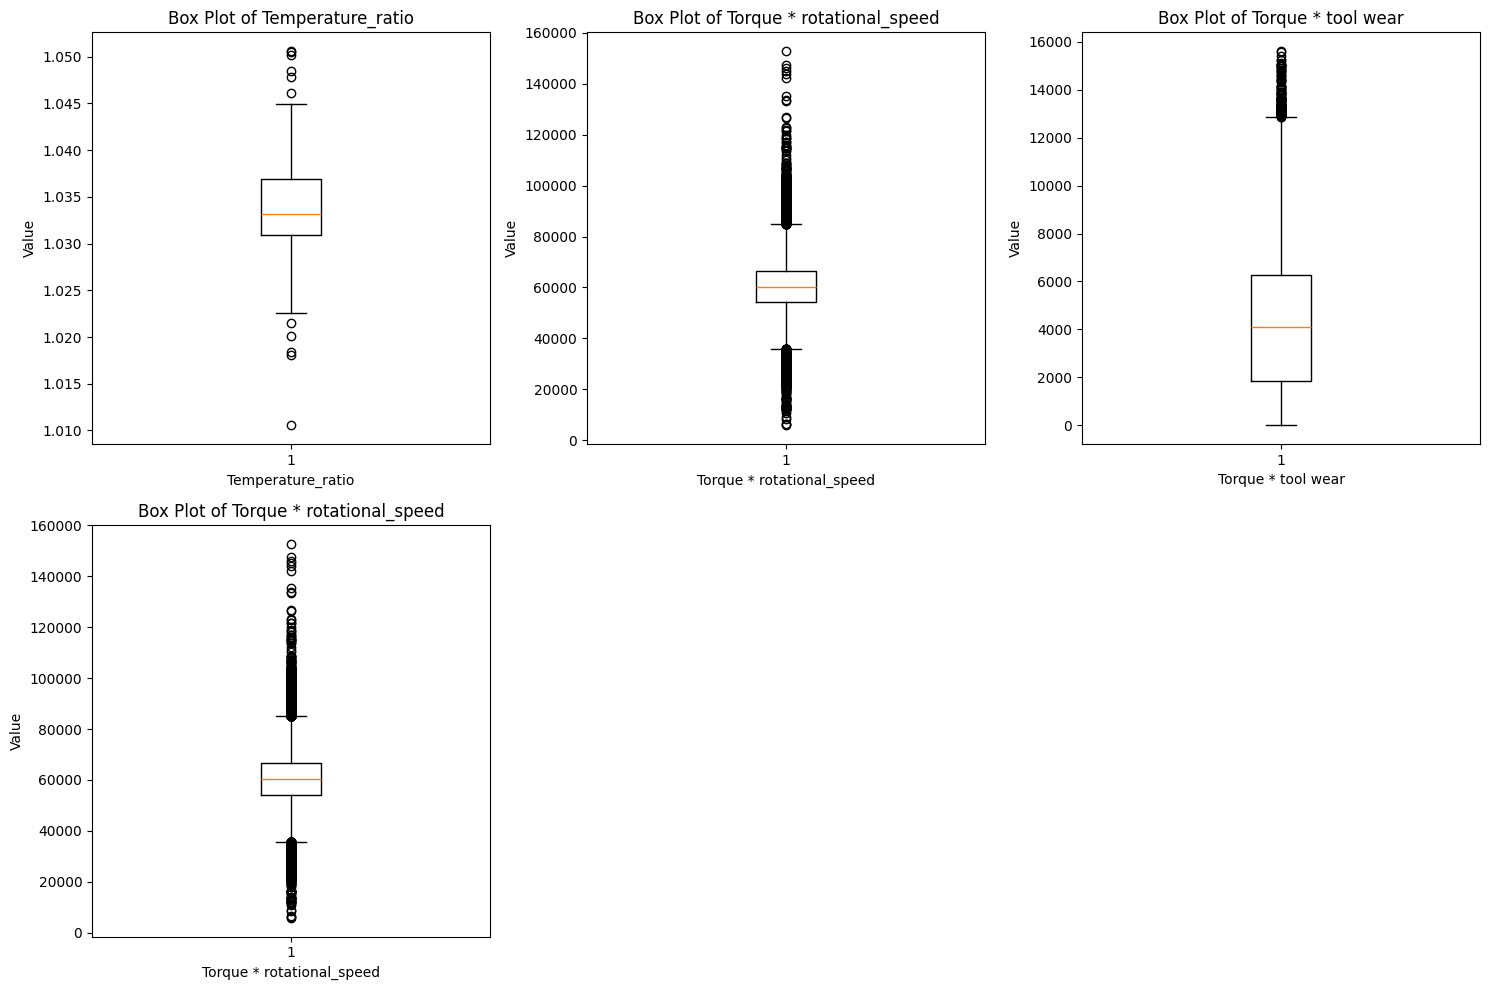

In [367]:
plot_boxplots(column_names=new_Features)

### Categorical Columns

In [368]:
cat_cols

['Product_ID', 'Type']

In [369]:
def plot_unique_value_counts(column_names,dataframe=df):
    """
    Function to plot the number of unique values and their percentages for specific columns in the given DataFrame.

    Parameters:
    dataframe (pandas.DataFrame): The DataFrame containing the data.
    column_names (list): List of column names for which the unique value counts will be plotted.

    Returns:
    None
    """
    num_plots = len(column_names)

    # Calculate the number of rows and columns for the subplot grid
    num_rows = (num_plots + 2) // 3
    num_cols = min(num_plots, 3)

    # Create a single plot for all columns
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
    axs = axs.ravel()

    for i, column_name in enumerate(column_names):
        # Check if the column_name exists in the DataFrame
        if column_name not in dataframe.columns:
            print(f"Error: Column '{column_name}' not found in the DataFrame.")
            continue

        # Get the unique value counts and their percentages for the column
        unique_value_counts = dataframe[column_name].nunique()
        total_values = len(dataframe[column_name])
        percentage = (unique_value_counts / total_values) * 100

        # Create the bar plot
        axs[i].bar([f'Unique Values'], [unique_value_counts], color='skyblue')
        axs[i].set_xlabel(column_name.capitalize())
        axs[i].set_ylabel('Number of Unique Values')
        axs[i].set_title(f'Number of Unique Values for {column_name.capitalize()}')

        # Annotate the bar plot with percentage values
        axs[i].text(0.5, 0.8, f'{percentage:.2f}%\n({unique_value_counts}/{total_values})',
                    horizontalalignment='center', verticalalignment='center', transform=axs[i].transAxes)

    # Hide any remaining empty subplots
    for j in range(num_plots, num_rows * num_cols):
        axs[j].axis('off')

    plt.tight_layout()
    plt.show()

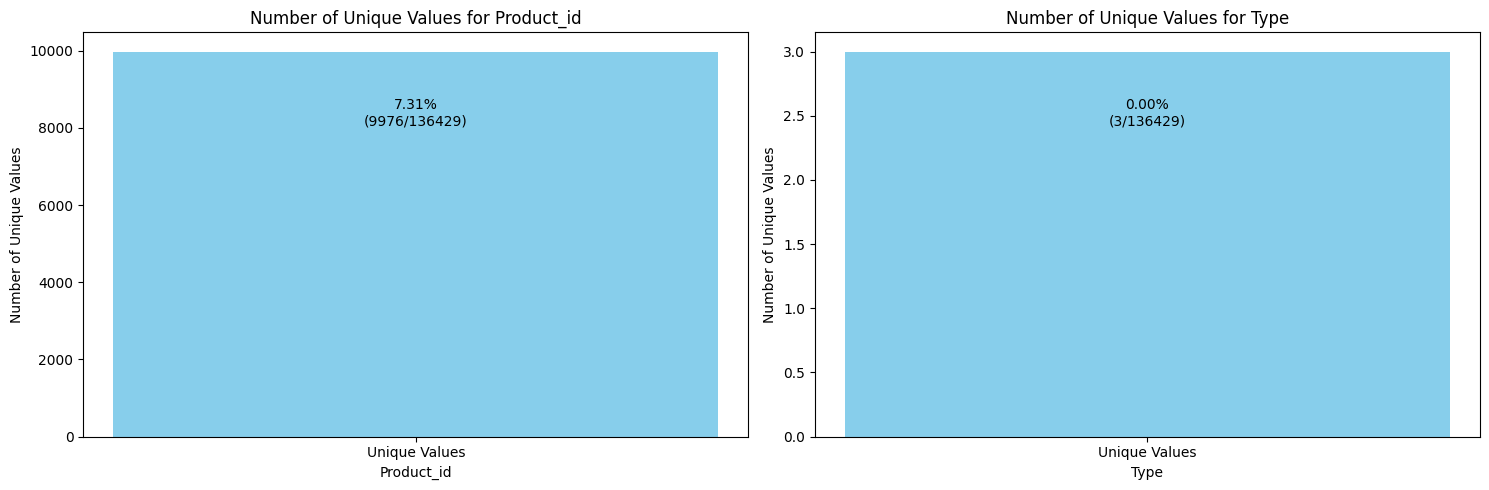

In [370]:
plot_unique_value_counts(column_names=cat_cols)

In [371]:
df[['Product_ID']].nunique()

Product_ID    9976
dtype: int64

In [372]:
df[['Type']].nunique()

Type    3
dtype: int64

In [373]:
from category_encoders import OrdinalEncoder

In [374]:
def cat_encoder(df, cat_cols=cat_cols, handle_missing='value', handle_unknown='value'):
    """
    Encode categorical columns in the DataFrame using label encoding.

    Parameters:
        df (pd.DataFrame): Data with categorical columns to encode.
        cat_cols (list): List of column names to encode.
        handle_missing (str): Strategy for handling missing values: 'value' or 'return_nan'.
        handle_unknown (str): Strategy for handling unknown categories: 'value' or 'return_nan'.

    Returns:
        df (pd.DataFrame): DataFrame with label-encoded categorical columns.
        encoder (OrdinalEncoder): The fitted ordinal encoder object.
    """
    from copy import deepcopy
    import pandas as pd

    # Validate inputs
    if not isinstance(df, pd.DataFrame):
        raise ValueError("df must be a pandas DataFrame.")
    if not set(cat_cols).issubset(df.columns):
        raise ValueError("cat_cols must be a subset of columns in df.")

    # Make a copy to avoid modifying the original data
    df = deepcopy(df)

    # Label Encoder
    encoder = OrdinalEncoder(cols=cat_cols, handle_missing=handle_missing, handle_unknown=handle_unknown)
    df[cat_cols] = encoder.fit_transform(df[cat_cols]).astype(int)

    return df, encoder

In [375]:
df, encoder=cat_encoder(df=df)

In [376]:
X_test,encoder=cat_encoder(df=X_test)

In [377]:
df

,Product_ID,Type,Air_temperature_K,Process_temperature_K,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,Machine_failure,TWF,HDF,PWF,OSF,RNF,Temperature_ratio,Torque * Rotational_speed,Torque * Tool wear
0,1,1,300.6,309.6,1596,36.1,140,0,0,0,0,0,0,1.029940,57615.6,5054.0
1,2,2,302.6,312.1,1759,29.1,200,0,0,0,0,0,0,1.031395,51186.9,5820.0
2,3,1,299.3,308.5,1805,26.5,25,0,0,0,0,0,0,1.030738,47832.5,662.5
3,4,1,301.0,310.9,1524,44.3,197,0,0,0,0,0,0,1.032890,67513.2,8727.1
4,5,2,298.0,309.0,1641,35.4,34,0,0,0,0,0,0,1.036913,58091.4,1203.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,607,2,300.1,311.4,1530,37.5,210,0,0,0,0,0,0,1.037654,57375.0,7875.0
136425,9103,3,297.5,308.5,1447,49.1,2,0,0,0,0,0,0,1.036975,71047.7,98.2
136426,4659,1,300.5,311.8,1524,38.5,214,0,0,0,0,0,0,1.037604,58674.0,8239.0
136427,912,1,301.7,310.9,1447,46.3,42,0,0,0,0,0,0,1.030494,66996.1,1944.6


### Traget Column 

In [378]:
target_col

'Machine_failure'

In [379]:
df[target_col].nunique()

2

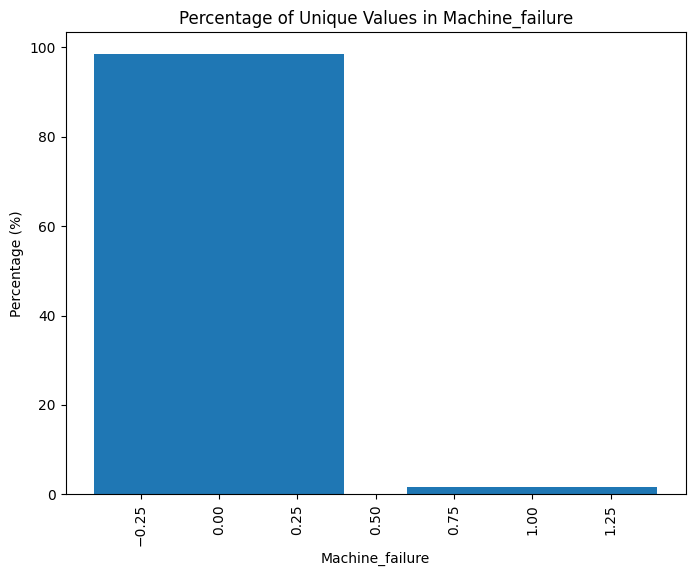

In [380]:

def plot_unique_value_percentage(df, target_column):
    # Get the counts of unique values in the target column
    value_counts = df[target_column].value_counts()
    
    # Calculate the percentage of each unique value
    total_values = len(df)
    percentages = (value_counts / total_values) * 100
    
    # Plot the percentage of unique values
    plt.figure(figsize=(8, 6))
    plt.bar(percentages.index, percentages.values)
    plt.xlabel(target_column)
    plt.ylabel('Percentage (%)')
    plt.title(f'Percentage of Unique Values in {target_column}')
    plt.xticks(rotation=90)
    plt.show()
    
plot_unique_value_percentage(df=df,target_column='Machine_failure')

### Input and Target

In [381]:
X_train=df.drop(columns='Machine_failure',axis=1)
y_train=df['Machine_failure']

In [382]:
y_train.shape

(136429,)

In [383]:
X_test=X_test.drop(columns='id',axis=1)

In [384]:
X_train

,Product_ID,Type,Air_temperature_K,Process_temperature_K,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,TWF,HDF,PWF,OSF,RNF,Temperature_ratio,Torque * Rotational_speed,Torque * Tool wear
0,1,1,300.6,309.6,1596,36.1,140,0,0,0,0,0,1.029940,57615.6,5054.0
1,2,2,302.6,312.1,1759,29.1,200,0,0,0,0,0,1.031395,51186.9,5820.0
2,3,1,299.3,308.5,1805,26.5,25,0,0,0,0,0,1.030738,47832.5,662.5
3,4,1,301.0,310.9,1524,44.3,197,0,0,0,0,0,1.032890,67513.2,8727.1
4,5,2,298.0,309.0,1641,35.4,34,0,0,0,0,0,1.036913,58091.4,1203.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,607,2,300.1,311.4,1530,37.5,210,0,0,0,0,0,1.037654,57375.0,7875.0
136425,9103,3,297.5,308.5,1447,49.1,2,0,0,0,0,0,1.036975,71047.7,98.2
136426,4659,1,300.5,311.8,1524,38.5,214,0,0,0,0,0,1.037604,58674.0,8239.0
136427,912,1,301.7,310.9,1447,46.3,42,0,0,0,0,0,1.030494,66996.1,1944.6


### Scaling 

In [385]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.compose import ColumnTransformer

scaler = MinMaxScaler()

preprocessor = ColumnTransformer(transformers=[('num', scaler, X_train.columns)])

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

X_train_scaled = pipeline.fit_transform(X_train)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [386]:
scaler = MinMaxScaler()

preprocessor = ColumnTransformer(transformers=[('num', scaler, X_test.columns)])

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])


X_test_scaled = pipeline.fit_transform(X_test)

X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [387]:
X_train_scaled

,Product_ID,Type,Air_temperature_K,Process_temperature_K,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,TWF,HDF,PWF,OSF,RNF,Temperature_ratio,Torque * Rotational_speed,Torque * Tool wear
0,0.000000,0.0,0.582418,0.4750,0.243402,0.443681,0.553360,0.0,0.0,0.0,0.0,0.0,0.484141,0.352222,0.323792
1,0.000100,0.5,0.802198,0.7875,0.339003,0.347527,0.790514,0.0,0.0,0.0,0.0,0.0,0.520445,0.308497,0.372867
2,0.000201,0.0,0.439560,0.3375,0.365982,0.311813,0.098814,0.0,0.0,0.0,0.0,0.0,0.504066,0.285682,0.042444
3,0.000301,0.0,0.626374,0.6375,0.201173,0.556319,0.778656,0.0,0.0,0.0,0.0,0.0,0.557780,0.419540,0.559114
4,0.000401,0.5,0.296703,0.4000,0.269795,0.434066,0.134387,0.0,0.0,0.0,0.0,0.0,0.658180,0.355458,0.077110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,0.060752,0.5,0.527473,0.7000,0.204692,0.462912,0.830040,0.0,0.0,0.0,0.0,0.0,0.676685,0.350586,0.504523
136425,0.912481,1.0,0.241758,0.3375,0.156012,0.622253,0.007905,0.0,0.0,0.0,0.0,0.0,0.659729,0.443580,0.006291
136426,0.466967,0.0,0.571429,0.7500,0.201173,0.476648,0.845850,0.0,0.0,0.0,0.0,0.0,0.675434,0.359421,0.527843
136427,0.091328,0.0,0.703297,0.6375,0.156012,0.583791,0.166008,0.0,0.0,0.0,0.0,0.0,0.497963,0.416023,0.124584


In [388]:
X_test_scaled

,Product_ID,Type,Air_temperature_K,Process_temperature_K,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,TWF,HDF,PWF,OSF,RNF,Temperature_ratio,Torque * Rotational_speed,Torque * Tool wear
0,0.000000,0.0,0.769231,0.716049,0.192666,0.469780,0.237154,0.0,0.0,0.0,0.0,0.0,0.454345,0.294539,0.138442
1,0.000101,0.0,0.703297,0.654321,0.317229,0.343407,0.067194,0.0,0.0,0.0,0.0,0.0,0.463927,0.249698,0.029729
2,0.000202,0.0,0.659341,0.580247,0.207800,0.465659,0.379447,0.0,0.0,0.0,0.0,0.0,0.448701,0.297658,0.219758
3,0.000303,0.5,0.527473,0.481481,0.181024,0.601648,0.019763,0.0,0.0,0.0,0.0,0.0,0.484234,0.373541,0.014451
4,0.000404,0.5,0.890110,0.814815,0.201979,0.515110,0.450593,0.0,0.0,0.0,0.0,0.0,0.427478,0.327505,0.285883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90949,0.537142,0.0,0.769231,0.703704,0.183935,0.502747,0.059289,0.0,0.0,0.0,0.0,0.0,0.446259,0.312126,0.036796
90950,0.273920,0.0,0.285714,0.506173,0.217695,0.412088,0.122530,0.0,0.0,0.0,0.0,0.0,0.686878,0.266072,0.063623
90951,0.222245,0.0,0.032967,0.061728,0.193830,0.516484,0.739130,0.0,0.0,0.0,0.0,0.0,0.586975,0.324988,0.470083
90952,0.634235,0.0,0.307692,0.259259,0.213038,0.501374,0.272727,0.0,0.0,0.0,0.0,0.0,0.505826,0.323100,0.168844


# Handeling Impbalance data 

In [389]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_scaled, y_train = smote.fit_resample(X_train_scaled, y_train)

# Handeling outliers using Z-score

In [390]:
from scipy import stats

def remove_outliers(df, threshold=3):
    z_scores = np.abs(stats.zscore(df))
    return df[(z_scores < threshold).all(axis=1)]

X_train_scaled = remove_outliers(X_train_scaled)
y_train = y_train.loc[X_train_scaled.index]


### Splitter

In [391]:
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
import pandas as pd

In [392]:
class Splitter:
    def __init__(self, kfold=True, n_splits=5, cat_df=pd.DataFrame(), test_size=0.3):
        self.n_splits = n_splits
        self.kfold = kfold
        self.cat_df = cat_df
        self.test_size = test_size

    def split_data(self, X, y, random_state_list=[42]):

        for random_state in random_state_list:
            kf = StratifiedKFold(n_splits=self.n_splits, random_state=random_state, shuffle=True)
            for train_index, val_index in kf.split(X, self.cat_df):
                X_train, X_val = X.iloc[train_index], X.iloc[val_index]
                y_train, y_val = y.iloc[train_index], y.iloc[val_index]
                yield X_train, X_val, y_train, y_val, val_index                        

### Models

In [393]:
import lightgbm as lgb
from catboost import CatBoostClassifier
import xgboost as xgb
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV


class ModelClassifier:
    def __init__(self):
        self.model_dict = {
            'LightGBM': lgb.LGBMClassifier(verbose=0),
            'CatBoost': CatBoostClassifier(silent=True, iterations=50),
            'XgBoost': xgb.XGBClassifier()
        }
        self.params = {
                        'LightGBM': {
                            'num_leaves': (10, 60),
                            'learning_rate': (0.01, 0.5),
                            'min_data_in_leaf': (10, 50),
                            'feature_fraction': (0.1, 0.9), 
                            'bagging_fraction': (0.5, 1.0)   
                        },
                        'CatBoost': {
                            'depth': (6, 16),
                            'learning_rate': (0.0, 0.5),
                            'l2_leaf_reg': (1, 10),
                            'iterations': (30, 30)
            
                        },
                        'XgBoost': {
                            'max_depth': (3, 50),
                            'learning_rate': (0.01, 0.4),
                            'n_estimators': (100, 500),
                            'min_child_weight': (1, 10)   
                        }
                    }   

    def fit_with_params(self, model_name, X, y):
        model = self.model_dict.get(model_name)
        if model:
            params = self.params.get(model_name, None)
            if params:
                print(f"Fitting {model_name} with specified parameters...")
                model.set_params(**params)
            else:
                print(f"Fitting {model_name} with default parameters.")
                # Implement fitting logic with default parameters

            return model.fit(X, y)
        else:
            raise ValueError(f"Model {model_name} not found. Please set the model first.")

    def fit_without_params(self, model_name, X, y):
        model = self.model_dict.get(model_name)
        if model:
            print(f"Fitting {model_name} without parameters.")
            return model.fit(X, y)
        else:
            raise ValueError(f"Model {model_name} not found. Please set the model first.")

### Model Predict

In [394]:
!pip install tqdm


[notice] A new release of pip available: 22.3.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [395]:
from tqdm import tqdm

In [396]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

models = ModelClassifier()
# Assuming Splitter and other variables are defined correctly as per your setup
splitter = Splitter(kfold=True, n_splits=10, cat_df=y_train)

def evaluate_model_performance(y_val_pred, y_val):
    y_pred = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions
    auc = roc_auc_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    return auc, precision, recall, f1

results = []  # List to store the results for each model

for model_name, model in models.model_dict.items():
    print(f"Fitting model {model_name}")
    model_scores = {
        'AUC': [],
        'Precision': [],
        'Recall': [],
        'F1': []
    }  # Dictionary to store scores for each cross-validation fold

    for X_Train, X_val, y_Train, y_val, val_index in tqdm(splitter.split_data(X=X_train_scaled, y=y_train)):
        # Fitting the model 
        fitted_model = models.fit_without_params(X=X_Train, y=y_Train, model_name=model_name)

        y_probs = fitted_model.predict_proba(X_val)[:, 1]  # Get probabilities for class 1
        auc, precision, recall, f1 = evaluate_model_performance(y_probs, y_val)
        model_scores['AUC'].append(auc)
        model_scores['Precision'].append(precision)
        model_scores['Recall'].append(recall)
        model_scores['F1'].append(f1)

    # Calculate the mean scores for this model
    mean_auc_score = np.mean(model_scores['AUC'])
    mean_precision_score = np.mean(model_scores['Precision'])
    mean_recall_score = np.mean(model_scores['Recall'])
    mean_f1_score = np.mean(model_scores['F1'])

    # Append the result to the results list
    results.append({
        'Model': model_name,
        'Mean_AUC_Score': mean_auc_score,
        'Mean_Precision_Score': mean_precision_score,
        'Mean_Recall_Score': mean_recall_score,
        'Mean_F1_Score': mean_f1_score
    })

# Convert the list of dictionaries into a DataFrame
auc_scores_df = pd.DataFrame(results)

print(auc_scores_df)


Fitting model LightGBM


0it [00:00, ?it/s]

Fitting LightGBM without parameters.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines


1it [00:02,  2.26s/it]

Fitting LightGBM without parameters.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines


2it [00:04,  2.26s/it]

Fitting LightGBM without parameters.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines


3it [00:06,  2.21s/it]

Fitting LightGBM without parameters.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines


4it [00:08,  2.11s/it]

Fitting LightGBM without parameters.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines


5it [00:10,  2.03s/it]

Fitting LightGBM without parameters.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines


6it [00:12,  2.00s/it]

Fitting LightGBM without parameters.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines


7it [00:14,  1.97s/it]

Fitting LightGBM without parameters.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines


8it [00:16,  1.95s/it]

Fitting LightGBM without parameters.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines


9it [00:18,  1.94s/it]

Fitting LightGBM without parameters.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines


10it [00:20,  2.02s/it]


Fitting model CatBoost


0it [00:00, ?it/s]

Fitting CatBoost without parameters.


1it [00:01,  1.97s/it]

Fitting CatBoost without parameters.


2it [00:03,  1.94s/it]

Fitting CatBoost without parameters.


3it [00:05,  1.90s/it]

Fitting CatBoost without parameters.


4it [00:07,  2.03s/it]

Fitting CatBoost without parameters.


5it [00:10,  2.05s/it]

Fitting CatBoost without parameters.


6it [00:11,  1.99s/it]

Fitting CatBoost without parameters.


7it [00:13,  1.97s/it]

Fitting CatBoost without parameters.


8it [00:15,  1.92s/it]

Fitting CatBoost without parameters.


9it [00:17,  1.90s/it]

Fitting CatBoost without parameters.


10it [00:19,  1.94s/it]


Fitting model XgBoost


0it [00:00, ?it/s]

Fitting XgBoost without parameters.


1it [00:02,  2.19s/it]

Fitting XgBoost without parameters.


2it [00:04,  2.04s/it]

Fitting XgBoost without parameters.


3it [00:06,  1.97s/it]

Fitting XgBoost without parameters.


4it [00:07,  1.94s/it]

Fitting XgBoost without parameters.


5it [00:09,  1.92s/it]

Fitting XgBoost without parameters.


6it [00:11,  1.92s/it]

Fitting XgBoost without parameters.


7it [00:13,  1.94s/it]

Fitting XgBoost without parameters.


8it [00:15,  1.95s/it]

Fitting XgBoost without parameters.


9it [00:17,  1.94s/it]

Fitting XgBoost without parameters.


10it [00:19,  1.95s/it]

      Model  Mean_AUC_Score  Mean_Precision_Score  Mean_Recall_Score  \
0  LightGBM        0.997831              0.991524           0.953390   
1  CatBoost        0.990698              0.975911           0.918196   
2   XgBoost        0.997673              0.988897           0.960314   

   Mean_F1_Score  
0       0.972081  
1       0.946171  
2       0.974394  


In [397]:
def choose_best_model(results_df):
    """
    Choose the best model based on the highest mean AUC score.

    Parameters:
        results_df (pd.DataFrame): DataFrame containing the model names and their mean AUC scores.

    Returns:
        str: The name of the best model.
    """
    best_model_name = results_df.loc[results_df['Mean_AUC_Score'].idxmax(), 'Model']
    return best_model_name

In [398]:
auc_scores_df

,Model,Mean_AUC_Score,Mean_Precision_Score,Mean_Recall_Score,Mean_F1_Score
0,LightGBM,0.997831,0.991524,0.953390,0.972081
1,CatBoost,0.990698,0.975911,0.918196,0.946171
2,XgBoost,0.997673,0.988897,0.960314,0.974394


In [399]:
best_model=choose_best_model(results_df=auc_scores_df)
best_model

'LightGBM'

### Feature Selection (RFE-CV)

In [400]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import roc_auc_score

class VotingEnsemble(BaseEstimator, ClassifierMixin):
    def __init__(self, estimators, voting='hard'):
        self.estimators = estimators
        self.voting = voting

    def fit(self, X, y):
        for _, model in self.estimators:
            model.fit(X, y)
        return self

    def predict(self, X):
        if self.voting == 'hard':
            predictions = np.asarray([model.predict(X) for _, model in self.estimators])
            return np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=predictions)
        elif self.voting == 'soft':
            probabilities = np.asarray([model.predict_proba(X) for _, model in self.estimators])
            return np.argmax(np.mean(probabilities, axis=0), axis=1)
        else:
            raise ValueError(f"Invalid voting method: {self.voting}. Use 'hard' or 'soft'.")

### Training with Params
- Optuna

In [401]:
import optuna
from functools import partial
from sklearn.base import is_classifier
from sklearn.metrics import roc_auc_score

In [402]:
import optuna
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
from tqdm import tqdm

class OptunaTuner_Catboost:
    def __init__(self, model, params, X, y):
        self.model = model
        self.params = params
        self.X = X
        self.y = y

    def Objective(self, trial):
        param_values = {}
        for key, value_range in self.params.items():
            if isinstance(value_range, tuple):  # Check if value_range is a tuple
                if value_range[0] <= value_range[1]:
                    if isinstance(value_range[0], int) and isinstance(value_range[1], int):
                        param_values[key] = trial.suggest_int(key, value_range[0], value_range[1])
                    else:
                        param_values[key] = trial.suggest_float(key, value_range[0], value_range[1])
                else:
                    raise ValueError(f"Invalid range for {key}: low={value_range[0]}, high={value_range[1]}")
            else:  # If value_range is not a tuple, treat it as a single value
                param_values[key] = value_range

        model = CatBoostClassifier(**param_values)
        
        # Initialize an empty list to store AUC-ROC scores from different folds
        auc_scores = []

        # Use the external data splitter for data splitting
        for X_Train, X_val, y_Train, y_val, val_index in tqdm(splitter.split_data(X=self.X, y=self.y)):
            # Perform tuning for each fold
            model.fit(X_Train, y_Train)  # Fit the model on the training data of this fold

            # Evaluate the model using AUC-ROC on the validation data of this fold
            y_probs = model.predict_proba(X_val)[:, 1]  # Get predicted probabilities for the positive class
            auc_roc = roc_auc_score(y_val, y_probs)
            
            
            # Append the AUC-ROC score of this fold to the list
            auc_scores.append(auc_roc)


        # Compute the average AUC-ROC score across all folds
        avg_auc_score = sum(auc_scores) / len(auc_scores)

        return avg_auc_score




    def tune(self, n_trials=100):
        study = optuna.create_study(direction="maximize")  # maximize AUC-ROC

        # Perform Optuna tuning
        study.optimize(self.Objective, n_trials=n_trials)

        best_params = study.best_params
        print(f"Best parameters: {best_params}")

        # Create a new CatBoost model instance with the best parameters
        best_model = CatBoostClassifier(**best_params)

        # Train the best model on the whole dataset
        best_model.fit(self.X, self.y)

        best_auc_score = study.best_value
        print(f"Best AUC Score: {best_auc_score}")

        # Here, we return both the tuned model and the best AUC-ROC score
        return best_auc_score, best_model

In [403]:

import optuna
from sklearn.metrics import roc_auc_score

class OptunaTuner:
    def __init__(self, model, params, X, y, splitter=splitter):
        self.model = model
        self.params = params
        self.X = X
        self.y = y
        self.splitter = splitter  # Assuming a data splitter object is passed

    def Objective(self, trial):
        param_values = {}
        for key, value_range in self.params.items():
            if value_range[0] <= value_range[1]:
                if isinstance(value_range[0], int) and isinstance(value_range[1], int):
                    param_values[key] = trial.suggest_int(key, value_range[0], value_range[1])
                else:
                    param_values[key] = trial.suggest_float(key, value_range[0], value_range[1])
            else:
                raise ValueError(f"Invalid range for {key}: low={value_range[0]}, high={value_range[1]}")

        self.model.set_params(**param_values)

        # Initialize an empty list to store AUC-ROC scores from different folds
        auc_scores = []

        for X_Train, X_val, y_Train, y_val, val_index in tqdm(self.splitter.split_data(X=self.X, y=self.y)):
            # Fit the model on the training data of this fold
            self.model.fit(X_Train, y_Train)

            # Evaluate the model using AUC-ROC on the validation data of this fold
            y_probs = self.model.predict_proba(X_val)[:, 1]
            auc_roc = roc_auc_score(y_val, y_probs)

            # Append the AUC-ROC score of this fold to the list
            auc_scores.append(auc_roc)

        # Compute the average AUC-ROC score across all folds
        avg_auc_score = sum(auc_scores) / len(auc_scores)

        return avg_auc_score

    def tune(self, n_trials=100):
        study = optuna.create_study(direction="maximize")  # maximize average AUC-ROC score
        study.optimize(self.Objective, n_trials=n_trials)

        best_params = study.best_params
        print(f"Best parameters: {best_params}")

        # Set the best parameters to the model
        self.model.set_params(**best_params)

        print(f"Best AUC Score: {study.best_value}")

        # Here, we return both the tuned model and the best AUC-ROC score
        return study.best_value, self.model
    

In [404]:
models = ModelClassifier()

results = {}  # Dictionary to store the best models and their AUC scores

# List to store the tuned models
tuned_models = []

for model_name, model in models.model_dict.items():
    if model_name == 'CatBoost':

        print(f"Tuning and fitting model ----------->>>>  {model_name}")

        # Create an instance of OptunaTuner for each model
        tuner = OptunaTuner_Catboost(model, params=models.params[model_name], X=X_train_scaled, y=y_train)

        # Perform hyperparameter tuning
        best_auc_score, tuned_model = tuner.tune(n_trials=5)

        print(f"Best AUC score for {model_name}: {best_auc_score}")
        print("----------------------")

        # Append the tuned model to the list of tuned models
        tuned_models.append((model_name, tuned_model))
        
        results[model_name] = best_auc_score
        
        
    else: 
        
        print(f"Tuning and fitting model ----------->>>>  {model_name}")

        # Create an instance of OptunaTuner for each model
        tuner = OptunaTuner(model, params=models.params[model_name], X=X_train_scaled, y=y_train)

        # Perform hyperparameter tuning
        best_auc_score, tuned_model = tuner.tune(n_trials=5)

        print(f"Best AUC score for {model_name}: {best_auc_score}")
        print("----------------------")

        # Append the tuned model to the list of tuned models
        tuned_models.append((model_name, tuned_model))
        
        results[model_name] = best_auc_score
        
# Convert the 'results' dictionary to a DataFrame
result_df = pd.DataFrame(results.items(), columns=['Model', 'Best AUC Score'])

[I 2024-06-30 12:23:44,473] A new study created in memory with name: no-name-29ac62a8-4aa1-41ee-b9e8-abeb38b7f99b


Tuning and fitting model ----------->>>>  LightGBM


0it [00:00, ?it/s]

[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] feature_fraction is set=0.2738910987798412, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2738910987798412
[LightGBM] [Warning] bagging_fraction is set=0.5009937636806028, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5009937636806028
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] feature_fraction is set=0.2738910987798412, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2738910987798412
[LightGBM] [Warning] bagging_fraction is set=0.5009937636806028, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5009937636806028


1it [00:01,  1.99s/it]

[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] feature_fraction is set=0.2738910987798412, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2738910987798412
[LightGBM] [Warning] bagging_fraction is set=0.5009937636806028, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5009937636806028
[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] feature_fraction is set=0.2738910987798412, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2738910987798412
[LightGBM] [Warning] bagging_fraction is set=0.5009937636806028, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5009937636806028
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will

2it [00:03,  1.98s/it]

[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] feature_fraction is set=0.2738910987798412, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2738910987798412
[LightGBM] [Warning] bagging_fraction is set=0.5009937636806028, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5009937636806028
[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] feature_fraction is set=0.2738910987798412, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2738910987798412
[LightGBM] [Warning] bagging_fraction is set=0.5009937636806028, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5009937636806028
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will

3it [00:05,  1.85s/it]

[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] feature_fraction is set=0.2738910987798412, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2738910987798412
[LightGBM] [Warning] bagging_fraction is set=0.5009937636806028, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5009937636806028
[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] feature_fraction is set=0.2738910987798412, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2738910987798412
[LightGBM] [Warning] bagging_fraction is set=0.5009937636806028, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5009937636806028
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will

4it [00:07,  1.80s/it]

[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] feature_fraction is set=0.2738910987798412, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2738910987798412
[LightGBM] [Warning] bagging_fraction is set=0.5009937636806028, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5009937636806028
[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] feature_fraction is set=0.2738910987798412, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2738910987798412
[LightGBM] [Warning] bagging_fraction is set=0.5009937636806028, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5009937636806028
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will

5it [00:09,  1.92s/it]

[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] feature_fraction is set=0.2738910987798412, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2738910987798412
[LightGBM] [Warning] bagging_fraction is set=0.5009937636806028, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5009937636806028
[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] feature_fraction is set=0.2738910987798412, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2738910987798412
[LightGBM] [Warning] bagging_fraction is set=0.5009937636806028, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5009937636806028
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will

6it [00:11,  1.89s/it]

[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] feature_fraction is set=0.2738910987798412, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2738910987798412
[LightGBM] [Warning] bagging_fraction is set=0.5009937636806028, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5009937636806028
[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] feature_fraction is set=0.2738910987798412, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2738910987798412
[LightGBM] [Warning] bagging_fraction is set=0.5009937636806028, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5009937636806028
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will

7it [00:13,  1.85s/it]

[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] feature_fraction is set=0.2738910987798412, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2738910987798412
[LightGBM] [Warning] bagging_fraction is set=0.5009937636806028, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5009937636806028
[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] feature_fraction is set=0.2738910987798412, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2738910987798412
[LightGBM] [Warning] bagging_fraction is set=0.5009937636806028, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5009937636806028
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will

8it [00:15,  1.87s/it]

[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] feature_fraction is set=0.2738910987798412, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2738910987798412
[LightGBM] [Warning] bagging_fraction is set=0.5009937636806028, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5009937636806028
[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] feature_fraction is set=0.2738910987798412, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2738910987798412
[LightGBM] [Warning] bagging_fraction is set=0.5009937636806028, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5009937636806028
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will

9it [00:16,  1.88s/it]

[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] feature_fraction is set=0.2738910987798412, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2738910987798412
[LightGBM] [Warning] bagging_fraction is set=0.5009937636806028, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5009937636806028
[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] feature_fraction is set=0.2738910987798412, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2738910987798412
[LightGBM] [Warning] bagging_fraction is set=0.5009937636806028, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5009937636806028
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will

10it [00:18,  1.87s/it]
[I 2024-06-30 12:24:03,237] Trial 0 finished with value: 0.9992204599570247 and parameters: {'num_leaves': 42, 'learning_rate': 0.44643270801445767, 'min_data_in_leaf': 37, 'feature_fraction': 0.2738910987798412, 'bagging_fraction': 0.5009937636806028}. Best is trial 0 with value: 0.9992204599570247.


[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] feature_fraction is set=0.2738910987798412, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2738910987798412
[LightGBM] [Warning] bagging_fraction is set=0.5009937636806028, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5009937636806028


0it [00:00, ?it/s]

[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] feature_fraction is set=0.6727814428807197, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6727814428807197
[LightGBM] [Warning] bagging_fraction is set=0.816038953154915, subsample=1.0 will be ignored. Current value: bagging_fraction=0.816038953154915
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] feature_fraction is set=0.6727814428807197, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6727814428807197
[LightGBM] [Warning] bagging_fraction is set=0.816038953154915, subsample=1.0 will be ignored. Current value: bagging_fraction=0.816038953154915


1it [00:02,  2.30s/it]

[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] feature_fraction is set=0.6727814428807197, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6727814428807197
[LightGBM] [Warning] bagging_fraction is set=0.816038953154915, subsample=1.0 will be ignored. Current value: bagging_fraction=0.816038953154915
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] feature_fraction is set=0.6727814428807197, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6727814428807197
[LightGBM] [Warning] bagging_fraction is set=0.816038953154915, subsample=1.0 will be ignored. Current value: bagging_fraction=0.816038953154915
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be 

2it [00:04,  2.08s/it]

[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] feature_fraction is set=0.6727814428807197, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6727814428807197
[LightGBM] [Warning] bagging_fraction is set=0.816038953154915, subsample=1.0 will be ignored. Current value: bagging_fraction=0.816038953154915
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] feature_fraction is set=0.6727814428807197, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6727814428807197
[LightGBM] [Warning] bagging_fraction is set=0.816038953154915, subsample=1.0 will be ignored. Current value: bagging_fraction=0.816038953154915
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be 

3it [00:06,  1.97s/it]

[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] feature_fraction is set=0.6727814428807197, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6727814428807197
[LightGBM] [Warning] bagging_fraction is set=0.816038953154915, subsample=1.0 will be ignored. Current value: bagging_fraction=0.816038953154915
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] feature_fraction is set=0.6727814428807197, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6727814428807197
[LightGBM] [Warning] bagging_fraction is set=0.816038953154915, subsample=1.0 will be ignored. Current value: bagging_fraction=0.816038953154915
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be 

4it [00:07,  1.95s/it]

[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] feature_fraction is set=0.6727814428807197, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6727814428807197
[LightGBM] [Warning] bagging_fraction is set=0.816038953154915, subsample=1.0 will be ignored. Current value: bagging_fraction=0.816038953154915
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] feature_fraction is set=0.6727814428807197, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6727814428807197
[LightGBM] [Warning] bagging_fraction is set=0.816038953154915, subsample=1.0 will be ignored. Current value: bagging_fraction=0.816038953154915
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be 

5it [00:09,  1.95s/it]

[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] feature_fraction is set=0.6727814428807197, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6727814428807197
[LightGBM] [Warning] bagging_fraction is set=0.816038953154915, subsample=1.0 will be ignored. Current value: bagging_fraction=0.816038953154915
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] feature_fraction is set=0.6727814428807197, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6727814428807197
[LightGBM] [Warning] bagging_fraction is set=0.816038953154915, subsample=1.0 will be ignored. Current value: bagging_fraction=0.816038953154915
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be 

6it [00:11,  1.98s/it]

[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] feature_fraction is set=0.6727814428807197, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6727814428807197
[LightGBM] [Warning] bagging_fraction is set=0.816038953154915, subsample=1.0 will be ignored. Current value: bagging_fraction=0.816038953154915
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] feature_fraction is set=0.6727814428807197, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6727814428807197
[LightGBM] [Warning] bagging_fraction is set=0.816038953154915, subsample=1.0 will be ignored. Current value: bagging_fraction=0.816038953154915
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be 

7it [00:13,  1.94s/it]

[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] feature_fraction is set=0.6727814428807197, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6727814428807197
[LightGBM] [Warning] bagging_fraction is set=0.816038953154915, subsample=1.0 will be ignored. Current value: bagging_fraction=0.816038953154915
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] feature_fraction is set=0.6727814428807197, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6727814428807197
[LightGBM] [Warning] bagging_fraction is set=0.816038953154915, subsample=1.0 will be ignored. Current value: bagging_fraction=0.816038953154915
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be 

8it [00:15,  1.92s/it]

[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] feature_fraction is set=0.6727814428807197, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6727814428807197
[LightGBM] [Warning] bagging_fraction is set=0.816038953154915, subsample=1.0 will be ignored. Current value: bagging_fraction=0.816038953154915
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] feature_fraction is set=0.6727814428807197, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6727814428807197
[LightGBM] [Warning] bagging_fraction is set=0.816038953154915, subsample=1.0 will be ignored. Current value: bagging_fraction=0.816038953154915
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be 

9it [00:17,  1.90s/it]

[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] feature_fraction is set=0.6727814428807197, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6727814428807197
[LightGBM] [Warning] bagging_fraction is set=0.816038953154915, subsample=1.0 will be ignored. Current value: bagging_fraction=0.816038953154915
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] feature_fraction is set=0.6727814428807197, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6727814428807197
[LightGBM] [Warning] bagging_fraction is set=0.816038953154915, subsample=1.0 will be ignored. Current value: bagging_fraction=0.816038953154915
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be 

10it [00:19,  1.94s/it]
[I 2024-06-30 12:24:22,634] Trial 1 finished with value: 0.9927579562228059 and parameters: {'num_leaves': 26, 'learning_rate': 0.07377825078928042, 'min_data_in_leaf': 15, 'feature_fraction': 0.6727814428807197, 'bagging_fraction': 0.816038953154915}. Best is trial 0 with value: 0.9992204599570247.


[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] feature_fraction is set=0.6727814428807197, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6727814428807197
[LightGBM] [Warning] bagging_fraction is set=0.816038953154915, subsample=1.0 will be ignored. Current value: bagging_fraction=0.816038953154915


0it [00:00, ?it/s]

[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] feature_fraction is set=0.3542116614486913, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3542116614486913
[LightGBM] [Warning] bagging_fraction is set=0.9086091110118758, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9086091110118758
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] feature_fraction is set=0.3542116614486913, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3542116614486913
[LightGBM] [Warning] bagging_fraction is set=0.9086091110118758, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9086091110118758


1it [00:01,  1.87s/it]

[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] feature_fraction is set=0.3542116614486913, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3542116614486913
[LightGBM] [Warning] bagging_fraction is set=0.9086091110118758, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9086091110118758
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] feature_fraction is set=0.3542116614486913, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3542116614486913
[LightGBM] [Warning] bagging_fraction is set=0.9086091110118758, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9086091110118758
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will

2it [00:03,  2.00s/it]

[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] feature_fraction is set=0.3542116614486913, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3542116614486913
[LightGBM] [Warning] bagging_fraction is set=0.9086091110118758, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9086091110118758
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] feature_fraction is set=0.3542116614486913, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3542116614486913
[LightGBM] [Warning] bagging_fraction is set=0.9086091110118758, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9086091110118758
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will

3it [00:05,  1.95s/it]

[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] feature_fraction is set=0.3542116614486913, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3542116614486913
[LightGBM] [Warning] bagging_fraction is set=0.9086091110118758, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9086091110118758
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] feature_fraction is set=0.3542116614486913, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3542116614486913
[LightGBM] [Warning] bagging_fraction is set=0.9086091110118758, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9086091110118758
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will

4it [00:07,  1.94s/it]

[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] feature_fraction is set=0.3542116614486913, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3542116614486913
[LightGBM] [Warning] bagging_fraction is set=0.9086091110118758, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9086091110118758
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] feature_fraction is set=0.3542116614486913, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3542116614486913
[LightGBM] [Warning] bagging_fraction is set=0.9086091110118758, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9086091110118758
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will

5it [00:09,  1.92s/it]

[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] feature_fraction is set=0.3542116614486913, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3542116614486913
[LightGBM] [Warning] bagging_fraction is set=0.9086091110118758, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9086091110118758
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] feature_fraction is set=0.3542116614486913, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3542116614486913
[LightGBM] [Warning] bagging_fraction is set=0.9086091110118758, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9086091110118758
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will

6it [00:11,  1.96s/it]

[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] feature_fraction is set=0.3542116614486913, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3542116614486913
[LightGBM] [Warning] bagging_fraction is set=0.9086091110118758, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9086091110118758
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] feature_fraction is set=0.3542116614486913, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3542116614486913
[LightGBM] [Warning] bagging_fraction is set=0.9086091110118758, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9086091110118758
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will

7it [00:13,  1.94s/it]

[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] feature_fraction is set=0.3542116614486913, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3542116614486913
[LightGBM] [Warning] bagging_fraction is set=0.9086091110118758, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9086091110118758
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] feature_fraction is set=0.3542116614486913, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3542116614486913
[LightGBM] [Warning] bagging_fraction is set=0.9086091110118758, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9086091110118758
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will

8it [00:15,  1.94s/it]

[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] feature_fraction is set=0.3542116614486913, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3542116614486913
[LightGBM] [Warning] bagging_fraction is set=0.9086091110118758, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9086091110118758
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] feature_fraction is set=0.3542116614486913, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3542116614486913
[LightGBM] [Warning] bagging_fraction is set=0.9086091110118758, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9086091110118758
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will

9it [00:17,  1.92s/it]

[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] feature_fraction is set=0.3542116614486913, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3542116614486913
[LightGBM] [Warning] bagging_fraction is set=0.9086091110118758, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9086091110118758
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] feature_fraction is set=0.3542116614486913, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3542116614486913
[LightGBM] [Warning] bagging_fraction is set=0.9086091110118758, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9086091110118758
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will

10it [00:19,  1.93s/it]
[I 2024-06-30 12:24:41,968] Trial 2 finished with value: 0.9980443224918799 and parameters: {'num_leaves': 29, 'learning_rate': 0.37296793868383776, 'min_data_in_leaf': 23, 'feature_fraction': 0.3542116614486913, 'bagging_fraction': 0.9086091110118758}. Best is trial 0 with value: 0.9992204599570247.


[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] feature_fraction is set=0.3542116614486913, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3542116614486913
[LightGBM] [Warning] bagging_fraction is set=0.9086091110118758, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9086091110118758


0it [00:00, ?it/s]

[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] feature_fraction is set=0.32326730248952096, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.32326730248952096
[LightGBM] [Warning] bagging_fraction is set=0.7511770679097758, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7511770679097758
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] feature_fraction is set=0.32326730248952096, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.32326730248952096
[LightGBM] [Warning] bagging_fraction is set=0.7511770679097758, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7511770679097758


1it [00:02,  2.07s/it]

[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] feature_fraction is set=0.32326730248952096, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.32326730248952096
[LightGBM] [Warning] bagging_fraction is set=0.7511770679097758, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7511770679097758
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] feature_fraction is set=0.32326730248952096, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.32326730248952096
[LightGBM] [Warning] bagging_fraction is set=0.7511770679097758, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7511770679097758
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 

2it [00:04,  2.04s/it]

[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] feature_fraction is set=0.32326730248952096, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.32326730248952096
[LightGBM] [Warning] bagging_fraction is set=0.7511770679097758, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7511770679097758
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] feature_fraction is set=0.32326730248952096, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.32326730248952096
[LightGBM] [Warning] bagging_fraction is set=0.7511770679097758, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7511770679097758
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 

3it [00:05,  1.91s/it]

[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] feature_fraction is set=0.32326730248952096, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.32326730248952096
[LightGBM] [Warning] bagging_fraction is set=0.7511770679097758, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7511770679097758
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] feature_fraction is set=0.32326730248952096, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.32326730248952096
[LightGBM] [Warning] bagging_fraction is set=0.7511770679097758, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7511770679097758
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 

4it [00:07,  1.95s/it]

[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] feature_fraction is set=0.32326730248952096, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.32326730248952096
[LightGBM] [Warning] bagging_fraction is set=0.7511770679097758, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7511770679097758
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] feature_fraction is set=0.32326730248952096, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.32326730248952096
[LightGBM] [Warning] bagging_fraction is set=0.7511770679097758, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7511770679097758
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 

5it [00:09,  1.97s/it]

[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] feature_fraction is set=0.32326730248952096, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.32326730248952096
[LightGBM] [Warning] bagging_fraction is set=0.7511770679097758, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7511770679097758
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] feature_fraction is set=0.32326730248952096, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.32326730248952096
[LightGBM] [Warning] bagging_fraction is set=0.7511770679097758, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7511770679097758
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 

6it [00:11,  1.98s/it]

[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] feature_fraction is set=0.32326730248952096, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.32326730248952096
[LightGBM] [Warning] bagging_fraction is set=0.7511770679097758, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7511770679097758
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] feature_fraction is set=0.32326730248952096, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.32326730248952096
[LightGBM] [Warning] bagging_fraction is set=0.7511770679097758, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7511770679097758
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 

7it [00:14,  2.10s/it]

[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] feature_fraction is set=0.32326730248952096, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.32326730248952096
[LightGBM] [Warning] bagging_fraction is set=0.7511770679097758, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7511770679097758
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] feature_fraction is set=0.32326730248952096, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.32326730248952096
[LightGBM] [Warning] bagging_fraction is set=0.7511770679097758, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7511770679097758
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 

8it [00:16,  2.10s/it]

[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] feature_fraction is set=0.32326730248952096, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.32326730248952096
[LightGBM] [Warning] bagging_fraction is set=0.7511770679097758, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7511770679097758
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] feature_fraction is set=0.32326730248952096, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.32326730248952096
[LightGBM] [Warning] bagging_fraction is set=0.7511770679097758, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7511770679097758
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 

9it [00:18,  2.16s/it]

[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] feature_fraction is set=0.32326730248952096, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.32326730248952096
[LightGBM] [Warning] bagging_fraction is set=0.7511770679097758, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7511770679097758
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] feature_fraction is set=0.32326730248952096, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.32326730248952096
[LightGBM] [Warning] bagging_fraction is set=0.7511770679097758, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7511770679097758
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 

10it [00:20,  2.08s/it]
[I 2024-06-30 12:25:02,790] Trial 3 finished with value: 0.9982674739279792 and parameters: {'num_leaves': 48, 'learning_rate': 0.42711302692080494, 'min_data_in_leaf': 39, 'feature_fraction': 0.32326730248952096, 'bagging_fraction': 0.7511770679097758}. Best is trial 0 with value: 0.9992204599570247.


[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] feature_fraction is set=0.32326730248952096, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.32326730248952096
[LightGBM] [Warning] bagging_fraction is set=0.7511770679097758, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7511770679097758


0it [00:00, ?it/s]

[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=46
[LightGBM] [Warning] feature_fraction is set=0.8078705576657698, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8078705576657698
[LightGBM] [Warning] bagging_fraction is set=0.9461209055211933, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9461209055211933
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=46
[LightGBM] [Warning] feature_fraction is set=0.8078705576657698, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8078705576657698
[LightGBM] [Warning] bagging_fraction is set=0.9461209055211933, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9461209055211933


1it [00:01,  1.46s/it]

[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=46
[LightGBM] [Warning] feature_fraction is set=0.8078705576657698, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8078705576657698
[LightGBM] [Warning] bagging_fraction is set=0.9461209055211933, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9461209055211933
[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=46
[LightGBM] [Warning] feature_fraction is set=0.8078705576657698, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8078705576657698
[LightGBM] [Warning] bagging_fraction is set=0.9461209055211933, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9461209055211933
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will

2it [00:02,  1.44s/it]

[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=46
[LightGBM] [Warning] feature_fraction is set=0.8078705576657698, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8078705576657698
[LightGBM] [Warning] bagging_fraction is set=0.9461209055211933, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9461209055211933
[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=46
[LightGBM] [Warning] feature_fraction is set=0.8078705576657698, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8078705576657698
[LightGBM] [Warning] bagging_fraction is set=0.9461209055211933, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9461209055211933
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will

3it [00:04,  1.49s/it]

[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=46
[LightGBM] [Warning] feature_fraction is set=0.8078705576657698, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8078705576657698
[LightGBM] [Warning] bagging_fraction is set=0.9461209055211933, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9461209055211933
[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=46
[LightGBM] [Warning] feature_fraction is set=0.8078705576657698, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8078705576657698
[LightGBM] [Warning] bagging_fraction is set=0.9461209055211933, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9461209055211933
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will

4it [00:05,  1.52s/it]

[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=46
[LightGBM] [Warning] feature_fraction is set=0.8078705576657698, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8078705576657698
[LightGBM] [Warning] bagging_fraction is set=0.9461209055211933, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9461209055211933
[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=46
[LightGBM] [Warning] feature_fraction is set=0.8078705576657698, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8078705576657698
[LightGBM] [Warning] bagging_fraction is set=0.9461209055211933, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9461209055211933
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will

5it [00:07,  1.49s/it]

[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=46
[LightGBM] [Warning] feature_fraction is set=0.8078705576657698, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8078705576657698
[LightGBM] [Warning] bagging_fraction is set=0.9461209055211933, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9461209055211933
[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=46
[LightGBM] [Warning] feature_fraction is set=0.8078705576657698, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8078705576657698
[LightGBM] [Warning] bagging_fraction is set=0.9461209055211933, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9461209055211933
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will

6it [00:08,  1.50s/it]

[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=46
[LightGBM] [Warning] feature_fraction is set=0.8078705576657698, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8078705576657698
[LightGBM] [Warning] bagging_fraction is set=0.9461209055211933, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9461209055211933
[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=46
[LightGBM] [Warning] feature_fraction is set=0.8078705576657698, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8078705576657698
[LightGBM] [Warning] bagging_fraction is set=0.9461209055211933, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9461209055211933
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will

7it [00:10,  1.47s/it]

[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=46
[LightGBM] [Warning] feature_fraction is set=0.8078705576657698, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8078705576657698
[LightGBM] [Warning] bagging_fraction is set=0.9461209055211933, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9461209055211933
[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=46
[LightGBM] [Warning] feature_fraction is set=0.8078705576657698, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8078705576657698
[LightGBM] [Warning] bagging_fraction is set=0.9461209055211933, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9461209055211933
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will

8it [00:11,  1.51s/it]

[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=46
[LightGBM] [Warning] feature_fraction is set=0.8078705576657698, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8078705576657698
[LightGBM] [Warning] bagging_fraction is set=0.9461209055211933, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9461209055211933
[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=46
[LightGBM] [Warning] feature_fraction is set=0.8078705576657698, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8078705576657698
[LightGBM] [Warning] bagging_fraction is set=0.9461209055211933, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9461209055211933
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will

9it [00:13,  1.54s/it]

[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=46
[LightGBM] [Warning] feature_fraction is set=0.8078705576657698, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8078705576657698
[LightGBM] [Warning] bagging_fraction is set=0.9461209055211933, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9461209055211933
[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=46
[LightGBM] [Warning] feature_fraction is set=0.8078705576657698, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8078705576657698
[LightGBM] [Warning] bagging_fraction is set=0.9461209055211933, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9461209055211933
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will

10it [00:14,  1.50s/it]
[I 2024-06-30 12:25:17,782] Trial 4 finished with value: 0.9962303384654205 and parameters: {'num_leaves': 11, 'learning_rate': 0.2346109493443951, 'min_data_in_leaf': 46, 'feature_fraction': 0.8078705576657698, 'bagging_fraction': 0.9461209055211933}. Best is trial 0 with value: 0.9992204599570247.
[I 2024-06-30 12:25:17,786] A new study created in memory with name: no-name-2b64d244-21d9-4785-b0df-47216518bb49


[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=46
[LightGBM] [Warning] feature_fraction is set=0.8078705576657698, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8078705576657698
[LightGBM] [Warning] bagging_fraction is set=0.9461209055211933, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9461209055211933
Best parameters: {'num_leaves': 42, 'learning_rate': 0.44643270801445767, 'min_data_in_leaf': 37, 'feature_fraction': 0.2738910987798412, 'bagging_fraction': 0.5009937636806028}
Best AUC Score: 0.9992204599570247
Best AUC score for LightGBM: 0.9992204599570247
----------------------
Tuning and fitting model ----------->>>>  CatBoost


0it [00:00, ?it/s]

0:	learn: 0.4680795	total: 54.2ms	remaining: 1.57s
1:	learn: 0.3701838	total: 104ms	remaining: 1.45s
2:	learn: 0.3149870	total: 154ms	remaining: 1.39s
3:	learn: 0.2837960	total: 202ms	remaining: 1.31s
4:	learn: 0.2636630	total: 253ms	remaining: 1.26s
5:	learn: 0.2509790	total: 306ms	remaining: 1.23s
6:	learn: 0.2424183	total: 354ms	remaining: 1.16s
7:	learn: 0.2308393	total: 408ms	remaining: 1.12s
8:	learn: 0.2225518	total: 462ms	remaining: 1.08s
9:	learn: 0.2173073	total: 516ms	remaining: 1.03s
10:	learn: 0.2119936	total: 565ms	remaining: 976ms
11:	learn: 0.2058744	total: 618ms	remaining: 927ms
12:	learn: 0.2004645	total: 667ms	remaining: 872ms
13:	learn: 0.1980377	total: 719ms	remaining: 822ms
14:	learn: 0.1958273	total: 765ms	remaining: 765ms
15:	learn: 0.1928143	total: 818ms	remaining: 716ms
16:	learn: 0.1912482	total: 867ms	remaining: 663ms
17:	learn: 0.1857201	total: 920ms	remaining: 613ms
18:	learn: 0.1805411	total: 973ms	remaining: 563ms
19:	learn: 0.1780390	total: 1.02s	remain

1it [00:01,  1.95s/it]

27:	learn: 0.1559961	total: 1.45s	remaining: 103ms
28:	learn: 0.1534460	total: 1.5s	remaining: 51.7ms
29:	learn: 0.1519955	total: 1.55s	remaining: 0us
0:	learn: 0.4685358	total: 55.6ms	remaining: 1.61s
1:	learn: 0.3688542	total: 110ms	remaining: 1.54s
2:	learn: 0.3140128	total: 166ms	remaining: 1.5s
3:	learn: 0.2829698	total: 219ms	remaining: 1.42s
4:	learn: 0.2633990	total: 300ms	remaining: 1.5s
5:	learn: 0.2503980	total: 362ms	remaining: 1.45s
6:	learn: 0.2409852	total: 428ms	remaining: 1.41s
7:	learn: 0.2343816	total: 484ms	remaining: 1.33s
8:	learn: 0.2224293	total: 542ms	remaining: 1.26s
9:	learn: 0.2178227	total: 593ms	remaining: 1.19s
10:	learn: 0.2126020	total: 651ms	remaining: 1.12s
11:	learn: 0.2081409	total: 702ms	remaining: 1.05s
12:	learn: 0.2024016	total: 758ms	remaining: 991ms
13:	learn: 0.1991895	total: 810ms	remaining: 926ms
14:	learn: 0.1943745	total: 870ms	remaining: 870ms
15:	learn: 0.1915984	total: 918ms	remaining: 803ms
16:	learn: 0.1887144	total: 969ms	remaining:

2it [00:03,  1.98s/it]

28:	learn: 0.1519496	total: 1.62s	remaining: 55.9ms
29:	learn: 0.1498609	total: 1.68s	remaining: 0us
0:	learn: 0.4679807	total: 49.4ms	remaining: 1.43s
1:	learn: 0.3699676	total: 98.7ms	remaining: 1.38s
2:	learn: 0.3137421	total: 151ms	remaining: 1.36s
3:	learn: 0.2821589	total: 200ms	remaining: 1.3s
4:	learn: 0.2620315	total: 252ms	remaining: 1.26s
5:	learn: 0.2480724	total: 321ms	remaining: 1.28s
6:	learn: 0.2358475	total: 399ms	remaining: 1.31s
7:	learn: 0.2282415	total: 454ms	remaining: 1.25s
8:	learn: 0.2226460	total: 509ms	remaining: 1.19s
9:	learn: 0.2174632	total: 575ms	remaining: 1.15s
10:	learn: 0.2131231	total: 631ms	remaining: 1.09s
11:	learn: 0.2086775	total: 689ms	remaining: 1.03s
12:	learn: 0.2035364	total: 740ms	remaining: 968ms
13:	learn: 0.1988312	total: 797ms	remaining: 911ms
14:	learn: 0.1948679	total: 856ms	remaining: 856ms
15:	learn: 0.1905650	total: 915ms	remaining: 801ms
16:	learn: 0.1858761	total: 973ms	remaining: 744ms
17:	learn: 0.1793749	total: 1.02s	remaini

3it [00:05,  1.99s/it]

0:	learn: 0.4681352	total: 50.3ms	remaining: 1.46s
1:	learn: 0.3701933	total: 100ms	remaining: 1.4s
2:	learn: 0.3144671	total: 154ms	remaining: 1.39s
3:	learn: 0.2826156	total: 208ms	remaining: 1.35s
4:	learn: 0.2611796	total: 263ms	remaining: 1.32s
5:	learn: 0.2480689	total: 321ms	remaining: 1.28s
6:	learn: 0.2390321	total: 381ms	remaining: 1.25s
7:	learn: 0.2318889	total: 433ms	remaining: 1.19s
8:	learn: 0.2219451	total: 494ms	remaining: 1.15s
9:	learn: 0.2173360	total: 549ms	remaining: 1.1s
10:	learn: 0.2132868	total: 609ms	remaining: 1.05s
11:	learn: 0.2060115	total: 664ms	remaining: 996ms
12:	learn: 0.2024966	total: 719ms	remaining: 940ms
13:	learn: 0.1989687	total: 773ms	remaining: 883ms
14:	learn: 0.1941551	total: 833ms	remaining: 833ms
15:	learn: 0.1891913	total: 891ms	remaining: 780ms
16:	learn: 0.1842795	total: 948ms	remaining: 725ms
17:	learn: 0.1825472	total: 999ms	remaining: 666ms
18:	learn: 0.1807283	total: 1.05s	remaining: 611ms
19:	learn: 0.1765349	total: 1.11s	remainin

4it [00:07,  2.01s/it]

28:	learn: 0.1500981	total: 1.64s	remaining: 56.5ms
29:	learn: 0.1474962	total: 1.7s	remaining: 0us
0:	learn: 0.4686860	total: 76.6ms	remaining: 2.22s
1:	learn: 0.3696881	total: 154ms	remaining: 2.15s
2:	learn: 0.3163133	total: 221ms	remaining: 1.99s
3:	learn: 0.2844207	total: 295ms	remaining: 1.92s
4:	learn: 0.2643123	total: 363ms	remaining: 1.81s
5:	learn: 0.2504632	total: 431ms	remaining: 1.73s
6:	learn: 0.2414959	total: 490ms	remaining: 1.61s
7:	learn: 0.2321596	total: 552ms	remaining: 1.52s
8:	learn: 0.2250639	total: 606ms	remaining: 1.41s
9:	learn: 0.2162509	total: 666ms	remaining: 1.33s
10:	learn: 0.2125370	total: 724ms	remaining: 1.25s
11:	learn: 0.2075482	total: 777ms	remaining: 1.17s
12:	learn: 0.2046552	total: 830ms	remaining: 1.08s
13:	learn: 0.2018895	total: 886ms	remaining: 1.01s
14:	learn: 0.1997611	total: 936ms	remaining: 936ms
15:	learn: 0.1946832	total: 999ms	remaining: 874ms
16:	learn: 0.1926363	total: 1.13s	remaining: 861ms
17:	learn: 0.1894406	total: 1.21s	remainin

5it [00:10,  2.12s/it]

28:	learn: 0.1593043	total: 1.92s	remaining: 66.1ms
29:	learn: 0.1542618	total: 1.97s	remaining: 0us
0:	learn: 0.4685358	total: 52.8ms	remaining: 1.53s
1:	learn: 0.3691936	total: 106ms	remaining: 1.48s
2:	learn: 0.3150378	total: 154ms	remaining: 1.38s
3:	learn: 0.2834256	total: 208ms	remaining: 1.35s
4:	learn: 0.2624125	total: 260ms	remaining: 1.3s
5:	learn: 0.2487282	total: 311ms	remaining: 1.25s
6:	learn: 0.2393910	total: 361ms	remaining: 1.19s
7:	learn: 0.2317928	total: 413ms	remaining: 1.14s
8:	learn: 0.2266793	total: 461ms	remaining: 1.07s
9:	learn: 0.2219430	total: 510ms	remaining: 1.02s
10:	learn: 0.2141281	total: 565ms	remaining: 976ms
11:	learn: 0.2093173	total: 615ms	remaining: 923ms
12:	learn: 0.2056046	total: 664ms	remaining: 868ms
13:	learn: 0.2014409	total: 718ms	remaining: 820ms
14:	learn: 0.1953530	total: 769ms	remaining: 769ms
15:	learn: 0.1934764	total: 819ms	remaining: 716ms
16:	learn: 0.1878116	total: 878ms	remaining: 671ms
17:	learn: 0.1810105	total: 935ms	remainin

6it [00:12,  2.08s/it]

29:	learn: 0.1497811	total: 1.58s	remaining: 0us
0:	learn: 0.4685757	total: 49.6ms	remaining: 1.44s
1:	learn: 0.3707278	total: 102ms	remaining: 1.43s
2:	learn: 0.3158160	total: 151ms	remaining: 1.35s
3:	learn: 0.2840171	total: 201ms	remaining: 1.31s
4:	learn: 0.2647483	total: 252ms	remaining: 1.26s
5:	learn: 0.2523000	total: 305ms	remaining: 1.22s
6:	learn: 0.2433771	total: 356ms	remaining: 1.17s
7:	learn: 0.2312657	total: 412ms	remaining: 1.13s
8:	learn: 0.2244028	total: 463ms	remaining: 1.08s
9:	learn: 0.2169516	total: 517ms	remaining: 1.03s
10:	learn: 0.2120534	total: 574ms	remaining: 991ms
11:	learn: 0.2063170	total: 633ms	remaining: 949ms
12:	learn: 0.2021903	total: 687ms	remaining: 898ms
13:	learn: 0.1980772	total: 850ms	remaining: 971ms
14:	learn: 0.1939137	total: 924ms	remaining: 924ms
15:	learn: 0.1909631	total: 982ms	remaining: 859ms
16:	learn: 0.1885646	total: 1.04s	remaining: 793ms
17:	learn: 0.1857265	total: 1.09s	remaining: 728ms
18:	learn: 0.1819695	total: 1.15s	remainin

7it [00:14,  2.08s/it]

0:	learn: 0.4685327	total: 50.4ms	remaining: 1.46s
1:	learn: 0.3694635	total: 99.7ms	remaining: 1.4s
2:	learn: 0.3159009	total: 147ms	remaining: 1.33s
3:	learn: 0.2846275	total: 197ms	remaining: 1.28s
4:	learn: 0.2644724	total: 248ms	remaining: 1.24s
5:	learn: 0.2493060	total: 304ms	remaining: 1.22s
6:	learn: 0.2408403	total: 356ms	remaining: 1.17s
7:	learn: 0.2334136	total: 404ms	remaining: 1.11s
8:	learn: 0.2267088	total: 456ms	remaining: 1.06s
9:	learn: 0.2203919	total: 508ms	remaining: 1.01s
10:	learn: 0.2168436	total: 560ms	remaining: 967ms
11:	learn: 0.2120874	total: 609ms	remaining: 914ms
12:	learn: 0.2071148	total: 658ms	remaining: 860ms
13:	learn: 0.2029355	total: 713ms	remaining: 815ms
14:	learn: 0.2003088	total: 762ms	remaining: 762ms
15:	learn: 0.1972263	total: 816ms	remaining: 714ms
16:	learn: 0.1937554	total: 872ms	remaining: 667ms
17:	learn: 0.1899835	total: 929ms	remaining: 619ms
18:	learn: 0.1840996	total: 981ms	remaining: 568ms
19:	learn: 0.1795821	total: 1.03s	remain

8it [00:16,  2.02s/it]

27:	learn: 0.1603568	total: 1.44s	remaining: 103ms
28:	learn: 0.1593478	total: 1.49s	remaining: 51.5ms
29:	learn: 0.1542670	total: 1.54s	remaining: 0us
0:	learn: 0.4686035	total: 50.5ms	remaining: 1.46s
1:	learn: 0.3705062	total: 101ms	remaining: 1.42s
2:	learn: 0.3151173	total: 151ms	remaining: 1.36s
3:	learn: 0.2833512	total: 200ms	remaining: 1.3s
4:	learn: 0.2623395	total: 251ms	remaining: 1.26s
5:	learn: 0.2489680	total: 304ms	remaining: 1.21s
6:	learn: 0.2400756	total: 353ms	remaining: 1.16s
7:	learn: 0.2285163	total: 406ms	remaining: 1.12s
8:	learn: 0.2232175	total: 459ms	remaining: 1.07s
9:	learn: 0.2187261	total: 509ms	remaining: 1.02s
10:	learn: 0.2123836	total: 567ms	remaining: 979ms
11:	learn: 0.2064948	total: 621ms	remaining: 931ms
12:	learn: 0.2033195	total: 673ms	remaining: 880ms
13:	learn: 0.2001012	total: 721ms	remaining: 824ms
14:	learn: 0.1968836	total: 773ms	remaining: 773ms
15:	learn: 0.1932602	total: 820ms	remaining: 718ms
16:	learn: 0.1886411	total: 879ms	remainin

9it [00:18,  1.98s/it]

27:	learn: 0.1568601	total: 1.46s	remaining: 104ms
28:	learn: 0.1544534	total: 1.51s	remaining: 52ms
29:	learn: 0.1507036	total: 1.56s	remaining: 0us
0:	learn: 0.4685140	total: 50ms	remaining: 1.45s
1:	learn: 0.3702074	total: 100ms	remaining: 1.4s
2:	learn: 0.3159873	total: 155ms	remaining: 1.4s
3:	learn: 0.2846232	total: 212ms	remaining: 1.38s
4:	learn: 0.2633793	total: 269ms	remaining: 1.34s
5:	learn: 0.2487716	total: 322ms	remaining: 1.29s
6:	learn: 0.2396252	total: 375ms	remaining: 1.23s
7:	learn: 0.2317113	total: 427ms	remaining: 1.18s
8:	learn: 0.2265405	total: 481ms	remaining: 1.12s
9:	learn: 0.2211339	total: 533ms	remaining: 1.06s
10:	learn: 0.2115100	total: 589ms	remaining: 1.02s
11:	learn: 0.2063867	total: 642ms	remaining: 963ms
12:	learn: 0.2025607	total: 692ms	remaining: 905ms
13:	learn: 0.1987094	total: 746ms	remaining: 853ms
14:	learn: 0.1963719	total: 795ms	remaining: 795ms
15:	learn: 0.1936081	total: 847ms	remaining: 741ms
16:	learn: 0.1900463	total: 902ms	remaining: 69

10it [00:20,  2.01s/it]
[I 2024-06-30 12:25:37,869] Trial 0 finished with value: 0.9856638918653319 and parameters: {'depth': 9, 'learning_rate': 0.4135636527417158, 'l2_leaf_reg': 6, 'iterations': 30}. Best is trial 0 with value: 0.9856638918653319.


29:	learn: 0.1575549	total: 1.57s	remaining: 0us


0it [00:00, ?it/s]

0:	learn: 0.6440818	total: 38.2ms	remaining: 1.11s
1:	learn: 0.6011234	total: 78.1ms	remaining: 1.09s
2:	learn: 0.5639273	total: 115ms	remaining: 1.03s
3:	learn: 0.5314321	total: 153ms	remaining: 994ms
4:	learn: 0.5029042	total: 193ms	remaining: 967ms
5:	learn: 0.4775288	total: 232ms	remaining: 928ms
6:	learn: 0.4549314	total: 271ms	remaining: 889ms
7:	learn: 0.4347824	total: 310ms	remaining: 851ms
8:	learn: 0.4168291	total: 348ms	remaining: 812ms
9:	learn: 0.4010796	total: 388ms	remaining: 776ms
10:	learn: 0.3866244	total: 425ms	remaining: 734ms
11:	learn: 0.3736623	total: 466ms	remaining: 699ms
12:	learn: 0.3619192	total: 509ms	remaining: 666ms
13:	learn: 0.3509973	total: 549ms	remaining: 628ms
14:	learn: 0.3415324	total: 590ms	remaining: 590ms
15:	learn: 0.3325898	total: 633ms	remaining: 554ms
16:	learn: 0.3247459	total: 672ms	remaining: 514ms
17:	learn: 0.3175857	total: 711ms	remaining: 474ms
18:	learn: 0.3109571	total: 752ms	remaining: 435ms
19:	learn: 0.3049263	total: 792ms	remai

1it [00:01,  1.56s/it]

0:	learn: 0.6441477	total: 42.6ms	remaining: 1.24s
1:	learn: 0.6013023	total: 79.8ms	remaining: 1.12s
2:	learn: 0.5641062	total: 117ms	remaining: 1.06s
3:	learn: 0.5314911	total: 159ms	remaining: 1.03s
4:	learn: 0.5029765	total: 200ms	remaining: 1000ms
5:	learn: 0.4774794	total: 241ms	remaining: 962ms
6:	learn: 0.4547534	total: 281ms	remaining: 922ms
7:	learn: 0.4349010	total: 322ms	remaining: 886ms
8:	learn: 0.4168943	total: 361ms	remaining: 843ms
9:	learn: 0.4008538	total: 404ms	remaining: 807ms
10:	learn: 0.3862481	total: 442ms	remaining: 764ms
11:	learn: 0.3730940	total: 483ms	remaining: 724ms
12:	learn: 0.3613127	total: 523ms	remaining: 684ms
13:	learn: 0.3505939	total: 566ms	remaining: 647ms
14:	learn: 0.3406974	total: 608ms	remaining: 608ms
15:	learn: 0.3317099	total: 651ms	remaining: 569ms
16:	learn: 0.3235630	total: 693ms	remaining: 530ms
17:	learn: 0.3163880	total: 735ms	remaining: 490ms
18:	learn: 0.3096290	total: 777ms	remaining: 450ms
19:	learn: 0.3035040	total: 820ms	rema

2it [00:03,  1.58s/it]

27:	learn: 0.2690613	total: 1.15s	remaining: 82.3ms
28:	learn: 0.2659255	total: 1.19s	remaining: 41.1ms
29:	learn: 0.2629829	total: 1.23s	remaining: 0us
0:	learn: 0.6441413	total: 40.7ms	remaining: 1.18s
1:	learn: 0.6012984	total: 80.1ms	remaining: 1.12s
2:	learn: 0.5641086	total: 118ms	remaining: 1.06s
3:	learn: 0.5314917	total: 158ms	remaining: 1.03s
4:	learn: 0.5030026	total: 199ms	remaining: 995ms
5:	learn: 0.4776215	total: 240ms	remaining: 960ms
6:	learn: 0.4549346	total: 279ms	remaining: 918ms
7:	learn: 0.4348319	total: 318ms	remaining: 875ms
8:	learn: 0.4167926	total: 357ms	remaining: 833ms
9:	learn: 0.4012668	total: 398ms	remaining: 795ms
10:	learn: 0.3866145	total: 436ms	remaining: 753ms
11:	learn: 0.3736181	total: 478ms	remaining: 718ms
12:	learn: 0.3618511	total: 520ms	remaining: 680ms
13:	learn: 0.3510571	total: 560ms	remaining: 640ms
14:	learn: 0.3411395	total: 604ms	remaining: 604ms
15:	learn: 0.3322535	total: 649ms	remaining: 568ms
16:	learn: 0.3242073	total: 691ms	remai

3it [00:04,  1.58s/it]

28:	learn: 0.2665366	total: 1.21s	remaining: 41.6ms
29:	learn: 0.2638650	total: 1.25s	remaining: 0us
0:	learn: 0.6442447	total: 39.1ms	remaining: 1.13s
1:	learn: 0.6013486	total: 77ms	remaining: 1.08s
2:	learn: 0.5641626	total: 116ms	remaining: 1.05s
3:	learn: 0.5315251	total: 155ms	remaining: 1.01s
4:	learn: 0.5029814	total: 197ms	remaining: 986ms
5:	learn: 0.4777064	total: 238ms	remaining: 951ms
6:	learn: 0.4550880	total: 280ms	remaining: 920ms
7:	learn: 0.4348983	total: 319ms	remaining: 878ms
8:	learn: 0.4169141	total: 359ms	remaining: 837ms
9:	learn: 0.4009738	total: 400ms	remaining: 800ms
10:	learn: 0.3863615	total: 442ms	remaining: 763ms
11:	learn: 0.3733749	total: 481ms	remaining: 721ms
12:	learn: 0.3616631	total: 522ms	remaining: 683ms
13:	learn: 0.3509293	total: 562ms	remaining: 643ms
14:	learn: 0.3410922	total: 601ms	remaining: 601ms
15:	learn: 0.3321615	total: 644ms	remaining: 563ms
16:	learn: 0.3240977	total: 683ms	remaining: 522ms
17:	learn: 0.3169384	total: 724ms	remainin

4it [00:06,  1.57s/it]

29:	learn: 0.2642505	total: 1.22s	remaining: 0us
0:	learn: 0.6442189	total: 41.1ms	remaining: 1.19s
1:	learn: 0.6015232	total: 79.8ms	remaining: 1.12s
2:	learn: 0.5643371	total: 118ms	remaining: 1.06s
3:	learn: 0.5317155	total: 160ms	remaining: 1.04s
4:	learn: 0.5031764	total: 201ms	remaining: 1.01s
5:	learn: 0.4780509	total: 240ms	remaining: 961ms
6:	learn: 0.4553282	total: 281ms	remaining: 923ms
7:	learn: 0.4352608	total: 321ms	remaining: 881ms
8:	learn: 0.4171086	total: 360ms	remaining: 839ms
9:	learn: 0.4010186	total: 399ms	remaining: 799ms
10:	learn: 0.3865797	total: 438ms	remaining: 757ms
11:	learn: 0.3734679	total: 480ms	remaining: 720ms
12:	learn: 0.3617941	total: 521ms	remaining: 682ms
13:	learn: 0.3511420	total: 561ms	remaining: 641ms
14:	learn: 0.3414801	total: 605ms	remaining: 605ms
15:	learn: 0.3326162	total: 645ms	remaining: 565ms
16:	learn: 0.3246251	total: 685ms	remaining: 524ms
17:	learn: 0.3175722	total: 724ms	remaining: 483ms
18:	learn: 0.3109042	total: 765ms	remaini

5it [00:07,  1.59s/it]

27:	learn: 0.2703510	total: 1.18s	remaining: 84.1ms
28:	learn: 0.2674511	total: 1.23s	remaining: 42.3ms
29:	learn: 0.2648010	total: 1.27s	remaining: 0us
0:	learn: 0.6441723	total: 42.2ms	remaining: 1.22s
1:	learn: 0.6013537	total: 83.8ms	remaining: 1.17s
2:	learn: 0.5641809	total: 124ms	remaining: 1.12s
3:	learn: 0.5316603	total: 165ms	remaining: 1.07s
4:	learn: 0.5031144	total: 205ms	remaining: 1.02s
5:	learn: 0.4778721	total: 247ms	remaining: 989ms
6:	learn: 0.4551730	total: 289ms	remaining: 949ms
7:	learn: 0.4351318	total: 326ms	remaining: 897ms
8:	learn: 0.4171630	total: 368ms	remaining: 859ms
9:	learn: 0.4011717	total: 408ms	remaining: 816ms
10:	learn: 0.3867233	total: 446ms	remaining: 771ms
11:	learn: 0.3736091	total: 488ms	remaining: 732ms
12:	learn: 0.3618031	total: 527ms	remaining: 690ms
13:	learn: 0.3509663	total: 572ms	remaining: 654ms
14:	learn: 0.3409605	total: 614ms	remaining: 614ms
15:	learn: 0.3320765	total: 655ms	remaining: 573ms
16:	learn: 0.3241307	total: 697ms	remai

6it [00:09,  1.60s/it]

26:	learn: 0.2724789	total: 1.13s	remaining: 125ms
27:	learn: 0.2691924	total: 1.17s	remaining: 83.6ms
28:	learn: 0.2662640	total: 1.21s	remaining: 41.9ms
29:	learn: 0.2636141	total: 1.26s	remaining: 0us
0:	learn: 0.6441796	total: 40.3ms	remaining: 1.17s
1:	learn: 0.6016409	total: 78.9ms	remaining: 1.1s
2:	learn: 0.5644231	total: 120ms	remaining: 1.08s
3:	learn: 0.5318495	total: 166ms	remaining: 1.08s
4:	learn: 0.5034371	total: 208ms	remaining: 1.04s
5:	learn: 0.4780634	total: 251ms	remaining: 1s
6:	learn: 0.4553833	total: 293ms	remaining: 961ms
7:	learn: 0.4352416	total: 332ms	remaining: 912ms
8:	learn: 0.4170194	total: 373ms	remaining: 871ms
9:	learn: 0.4013321	total: 413ms	remaining: 825ms
10:	learn: 0.3868519	total: 451ms	remaining: 779ms
11:	learn: 0.3739904	total: 491ms	remaining: 737ms
12:	learn: 0.3621018	total: 531ms	remaining: 694ms
13:	learn: 0.3512502	total: 574ms	remaining: 657ms
14:	learn: 0.3416817	total: 615ms	remaining: 615ms
15:	learn: 0.3327884	total: 658ms	remaining

7it [00:11,  1.59s/it]

28:	learn: 0.2674398	total: 1.2s	remaining: 41.4ms
29:	learn: 0.2645076	total: 1.24s	remaining: 0us
0:	learn: 0.6441703	total: 40.8ms	remaining: 1.18s
1:	learn: 0.6014351	total: 81.2ms	remaining: 1.14s
2:	learn: 0.5643036	total: 120ms	remaining: 1.08s
3:	learn: 0.5316489	total: 158ms	remaining: 1.03s
4:	learn: 0.5031206	total: 200ms	remaining: 999ms
5:	learn: 0.4776277	total: 240ms	remaining: 959ms
6:	learn: 0.4551265	total: 282ms	remaining: 926ms
7:	learn: 0.4352319	total: 321ms	remaining: 884ms
8:	learn: 0.4169967	total: 361ms	remaining: 842ms
9:	learn: 0.4011687	total: 404ms	remaining: 809ms
10:	learn: 0.3865667	total: 443ms	remaining: 765ms
11:	learn: 0.3736551	total: 482ms	remaining: 723ms
12:	learn: 0.3619654	total: 522ms	remaining: 682ms
13:	learn: 0.3512622	total: 564ms	remaining: 645ms
14:	learn: 0.3413738	total: 602ms	remaining: 602ms
15:	learn: 0.3324911	total: 644ms	remaining: 564ms
16:	learn: 0.3245585	total: 683ms	remaining: 522ms
17:	learn: 0.3174121	total: 728ms	remaini

8it [00:12,  1.59s/it]

28:	learn: 0.2665235	total: 1.2s	remaining: 41.3ms
29:	learn: 0.2638661	total: 1.24s	remaining: 0us
0:	learn: 0.6441736	total: 38.7ms	remaining: 1.12s
1:	learn: 0.6013456	total: 77.4ms	remaining: 1.08s
2:	learn: 0.5641784	total: 120ms	remaining: 1.07s
3:	learn: 0.5317320	total: 157ms	remaining: 1.02s
4:	learn: 0.5032062	total: 199ms	remaining: 994ms
5:	learn: 0.4779208	total: 237ms	remaining: 946ms
6:	learn: 0.4551110	total: 275ms	remaining: 904ms
7:	learn: 0.4350336	total: 317ms	remaining: 870ms
8:	learn: 0.4170660	total: 357ms	remaining: 832ms
9:	learn: 0.4011565	total: 399ms	remaining: 798ms
10:	learn: 0.3866687	total: 437ms	remaining: 755ms
11:	learn: 0.3737174	total: 475ms	remaining: 713ms
12:	learn: 0.3619528	total: 517ms	remaining: 676ms
13:	learn: 0.3512398	total: 559ms	remaining: 639ms
14:	learn: 0.3415677	total: 598ms	remaining: 598ms
15:	learn: 0.3327340	total: 640ms	remaining: 560ms
16:	learn: 0.3248571	total: 680ms	remaining: 520ms
17:	learn: 0.3175169	total: 718ms	remaini

9it [00:14,  1.57s/it]

0:	learn: 0.6442148	total: 39.4ms	remaining: 1.14s
1:	learn: 0.6017255	total: 78.5ms	remaining: 1.1s
2:	learn: 0.5645049	total: 122ms	remaining: 1.09s
3:	learn: 0.5319242	total: 162ms	remaining: 1.05s
4:	learn: 0.5034591	total: 203ms	remaining: 1.01s
5:	learn: 0.4779892	total: 244ms	remaining: 975ms
6:	learn: 0.4553784	total: 287ms	remaining: 944ms
7:	learn: 0.4353408	total: 326ms	remaining: 898ms
8:	learn: 0.4173527	total: 368ms	remaining: 859ms
9:	learn: 0.4014999	total: 410ms	remaining: 820ms
10:	learn: 0.3870410	total: 451ms	remaining: 779ms
11:	learn: 0.3740301	total: 493ms	remaining: 739ms
12:	learn: 0.3622324	total: 534ms	remaining: 699ms
13:	learn: 0.3515105	total: 575ms	remaining: 657ms
14:	learn: 0.3415061	total: 618ms	remaining: 618ms
15:	learn: 0.3325244	total: 659ms	remaining: 577ms
16:	learn: 0.3246156	total: 700ms	remaining: 535ms
17:	learn: 0.3173621	total: 741ms	remaining: 494ms
18:	learn: 0.3106059	total: 784ms	remaining: 454ms
19:	learn: 0.3045175	total: 829ms	remain

10it [00:15,  1.58s/it]
[I 2024-06-30 12:25:53,734] Trial 1 finished with value: 0.9569970255596928 and parameters: {'depth': 8, 'learning_rate': 0.0757319735787722, 'l2_leaf_reg': 8, 'iterations': 30}. Best is trial 0 with value: 0.9856638918653319.
0it [00:00, ?it/s]

0:	learn: 0.6514821	total: 137ms	remaining: 3.96s
1:	learn: 0.6148077	total: 269ms	remaining: 3.76s
2:	learn: 0.5821104	total: 400ms	remaining: 3.6s
3:	learn: 0.5526308	total: 533ms	remaining: 3.47s
4:	learn: 0.5260875	total: 677ms	remaining: 3.38s
5:	learn: 0.5020799	total: 813ms	remaining: 3.25s
6:	learn: 0.4802908	total: 954ms	remaining: 3.13s
7:	learn: 0.4605760	total: 1.1s	remaining: 3.02s
8:	learn: 0.4427925	total: 1.19s	remaining: 2.78s
9:	learn: 0.4262878	total: 1.33s	remaining: 2.66s
10:	learn: 0.4114106	total: 1.48s	remaining: 2.55s
11:	learn: 0.3975779	total: 1.61s	remaining: 2.42s
12:	learn: 0.3848326	total: 1.75s	remaining: 2.29s
13:	learn: 0.3732370	total: 1.89s	remaining: 2.16s
14:	learn: 0.3623872	total: 2.03s	remaining: 2.03s
15:	learn: 0.3524694	total: 2.17s	remaining: 1.9s
16:	learn: 0.3432821	total: 2.31s	remaining: 1.77s
17:	learn: 0.3347663	total: 2.45s	remaining: 1.63s
18:	learn: 0.3267910	total: 2.58s	remaining: 1.5s
19:	learn: 0.3195859	total: 2.73s	remaining: 

1it [00:04,  4.53s/it]

0:	learn: 0.6515542	total: 141ms	remaining: 4.1s
1:	learn: 0.6147880	total: 278ms	remaining: 3.89s
2:	learn: 0.5820195	total: 407ms	remaining: 3.66s
3:	learn: 0.5526130	total: 541ms	remaining: 3.52s
4:	learn: 0.5260065	total: 681ms	remaining: 3.4s
5:	learn: 0.5018735	total: 812ms	remaining: 3.25s
6:	learn: 0.4800909	total: 956ms	remaining: 3.14s
7:	learn: 0.4604203	total: 1.1s	remaining: 3.02s
8:	learn: 0.4426703	total: 1.19s	remaining: 2.77s
9:	learn: 0.4261968	total: 1.32s	remaining: 2.64s
10:	learn: 0.4113728	total: 1.46s	remaining: 2.53s
11:	learn: 0.3974577	total: 1.61s	remaining: 2.41s
12:	learn: 0.3846863	total: 1.75s	remaining: 2.29s
13:	learn: 0.3729112	total: 1.89s	remaining: 2.16s
14:	learn: 0.3619677	total: 2.03s	remaining: 2.03s
15:	learn: 0.3520688	total: 2.17s	remaining: 1.9s
16:	learn: 0.3428558	total: 2.31s	remaining: 1.77s
17:	learn: 0.3343310	total: 2.45s	remaining: 1.63s
18:	learn: 0.3267250	total: 2.59s	remaining: 1.5s
19:	learn: 0.3195056	total: 2.73s	remaining: 1

2it [00:09,  4.52s/it]

28:	learn: 0.2705397	total: 4s	remaining: 138ms
29:	learn: 0.2669409	total: 4.14s	remaining: 0us
0:	learn: 0.6514559	total: 143ms	remaining: 4.16s
1:	learn: 0.6147039	total: 298ms	remaining: 4.17s
2:	learn: 0.5819482	total: 454ms	remaining: 4.09s
3:	learn: 0.5524825	total: 594ms	remaining: 3.86s
4:	learn: 0.5259869	total: 745ms	remaining: 3.73s
5:	learn: 0.5019724	total: 893ms	remaining: 3.57s
6:	learn: 0.4801207	total: 1.03s	remaining: 3.4s
7:	learn: 0.4603917	total: 1.18s	remaining: 3.25s
8:	learn: 0.4426405	total: 1.33s	remaining: 3.1s
9:	learn: 0.4263072	total: 1.5s	remaining: 3s
10:	learn: 0.4113211	total: 1.64s	remaining: 2.84s
11:	learn: 0.3974333	total: 1.8s	remaining: 2.71s
12:	learn: 0.3848002	total: 1.95s	remaining: 2.56s
13:	learn: 0.3731884	total: 2.11s	remaining: 2.41s
14:	learn: 0.3622468	total: 2.26s	remaining: 2.26s
15:	learn: 0.3523951	total: 2.42s	remaining: 2.12s
16:	learn: 0.3430949	total: 2.6s	remaining: 1.99s
17:	learn: 0.3346746	total: 2.76s	remaining: 1.84s
18:

3it [00:14,  4.76s/it]

0:	learn: 0.6514727	total: 134ms	remaining: 3.87s
1:	learn: 0.6147443	total: 269ms	remaining: 3.76s
2:	learn: 0.5820757	total: 404ms	remaining: 3.63s
3:	learn: 0.5525958	total: 543ms	remaining: 3.53s
4:	learn: 0.5262035	total: 681ms	remaining: 3.4s
5:	learn: 0.5020697	total: 821ms	remaining: 3.28s
6:	learn: 0.4802926	total: 956ms	remaining: 3.14s
7:	learn: 0.4605232	total: 1.09s	remaining: 3s
8:	learn: 0.4427175	total: 1.22s	remaining: 2.85s
9:	learn: 0.4263637	total: 1.36s	remaining: 2.72s
10:	learn: 0.4113539	total: 1.5s	remaining: 2.59s
11:	learn: 0.3974890	total: 1.64s	remaining: 2.46s
12:	learn: 0.3848531	total: 1.78s	remaining: 2.33s
13:	learn: 0.3732185	total: 1.93s	remaining: 2.21s
14:	learn: 0.3623065	total: 2.08s	remaining: 2.08s
15:	learn: 0.3523843	total: 2.22s	remaining: 1.94s
16:	learn: 0.3430567	total: 2.36s	remaining: 1.8s
17:	learn: 0.3347108	total: 2.5s	remaining: 1.67s
18:	learn: 0.3268578	total: 2.64s	remaining: 1.53s
19:	learn: 0.3194934	total: 2.78s	remaining: 1.3

4it [00:18,  4.72s/it]

28:	learn: 0.2715111	total: 4.18s	remaining: 144ms
29:	learn: 0.2674863	total: 4.32s	remaining: 0us
0:	learn: 0.6515708	total: 131ms	remaining: 3.79s
1:	learn: 0.6147470	total: 271ms	remaining: 3.79s
2:	learn: 0.5819890	total: 410ms	remaining: 3.69s
3:	learn: 0.5526182	total: 546ms	remaining: 3.55s
4:	learn: 0.5259778	total: 688ms	remaining: 3.44s
5:	learn: 0.5018415	total: 837ms	remaining: 3.35s
6:	learn: 0.4802883	total: 967ms	remaining: 3.18s
7:	learn: 0.4604181	total: 1.1s	remaining: 3.03s
8:	learn: 0.4425772	total: 1.24s	remaining: 2.9s
9:	learn: 0.4261869	total: 1.39s	remaining: 2.77s
10:	learn: 0.4112249	total: 1.52s	remaining: 2.63s
11:	learn: 0.3973430	total: 1.67s	remaining: 2.5s
12:	learn: 0.3846418	total: 1.8s	remaining: 2.36s
13:	learn: 0.3729574	total: 1.95s	remaining: 2.23s
14:	learn: 0.3621913	total: 2.09s	remaining: 2.09s
15:	learn: 0.3524337	total: 2.24s	remaining: 1.96s
16:	learn: 0.3430912	total: 2.38s	remaining: 1.82s
17:	learn: 0.3343883	total: 2.52s	remaining: 1.

5it [00:23,  4.65s/it]

28:	learn: 0.2712998	total: 4.04s	remaining: 139ms
29:	learn: 0.2674029	total: 4.18s	remaining: 0us
0:	learn: 0.6515679	total: 132ms	remaining: 3.82s
1:	learn: 0.6147537	total: 274ms	remaining: 3.84s
2:	learn: 0.5820437	total: 411ms	remaining: 3.7s
3:	learn: 0.5525869	total: 547ms	remaining: 3.55s
4:	learn: 0.5263233	total: 692ms	remaining: 3.46s
5:	learn: 0.5022765	total: 832ms	remaining: 3.33s
6:	learn: 0.4805527	total: 972ms	remaining: 3.19s
7:	learn: 0.4607555	total: 1.11s	remaining: 3.05s
8:	learn: 0.4430386	total: 1.2s	remaining: 2.81s
9:	learn: 0.4265589	total: 1.35s	remaining: 2.69s
10:	learn: 0.4116723	total: 1.49s	remaining: 2.57s
11:	learn: 0.3978113	total: 1.63s	remaining: 2.44s
12:	learn: 0.3850982	total: 1.76s	remaining: 2.31s
13:	learn: 0.3734654	total: 1.9s	remaining: 2.17s
14:	learn: 0.3626417	total: 2.04s	remaining: 2.04s
15:	learn: 0.3528028	total: 2.18s	remaining: 1.91s
16:	learn: 0.3435858	total: 2.32s	remaining: 1.78s
17:	learn: 0.3350779	total: 2.46s	remaining: 1

6it [00:27,  4.59s/it]

0:	learn: 0.6515553	total: 141ms	remaining: 4.09s
1:	learn: 0.6147328	total: 276ms	remaining: 3.86s
2:	learn: 0.5821321	total: 407ms	remaining: 3.67s
3:	learn: 0.5527487	total: 541ms	remaining: 3.52s
4:	learn: 0.5263491	total: 682ms	remaining: 3.41s
5:	learn: 0.5022570	total: 819ms	remaining: 3.27s
6:	learn: 0.4805461	total: 957ms	remaining: 3.14s
7:	learn: 0.4608496	total: 1.1s	remaining: 3.03s
8:	learn: 0.4431974	total: 1.2s	remaining: 2.81s
9:	learn: 0.4266376	total: 1.34s	remaining: 2.69s
10:	learn: 0.4117931	total: 1.49s	remaining: 2.57s
11:	learn: 0.3979580	total: 1.63s	remaining: 2.44s
12:	learn: 0.3853359	total: 1.76s	remaining: 2.31s
13:	learn: 0.3736998	total: 1.9s	remaining: 2.18s
14:	learn: 0.3628852	total: 2.04s	remaining: 2.04s
15:	learn: 0.3529311	total: 2.17s	remaining: 1.9s
16:	learn: 0.3436663	total: 2.32s	remaining: 1.77s
17:	learn: 0.3350368	total: 2.46s	remaining: 1.64s
18:	learn: 0.3270809	total: 2.6s	remaining: 1.51s
19:	learn: 0.3197815	total: 2.75s	remaining: 1

7it [00:32,  4.58s/it]

0:	learn: 0.6515484	total: 144ms	remaining: 4.19s
1:	learn: 0.6148689	total: 292ms	remaining: 4.09s
2:	learn: 0.5820044	total: 437ms	remaining: 3.93s
3:	learn: 0.5526218	total: 579ms	remaining: 3.76s
4:	learn: 0.5260810	total: 723ms	remaining: 3.61s
5:	learn: 0.5020222	total: 886ms	remaining: 3.54s
6:	learn: 0.4803146	total: 1.05s	remaining: 3.47s
7:	learn: 0.4606776	total: 1.21s	remaining: 3.34s
8:	learn: 0.4428363	total: 1.38s	remaining: 3.22s
9:	learn: 0.4265240	total: 1.53s	remaining: 3.05s
10:	learn: 0.4115430	total: 1.67s	remaining: 2.89s
11:	learn: 0.3975334	total: 1.82s	remaining: 2.73s
12:	learn: 0.3850052	total: 1.96s	remaining: 2.57s
13:	learn: 0.3734145	total: 2.1s	remaining: 2.4s
14:	learn: 0.3626791	total: 2.25s	remaining: 2.25s
15:	learn: 0.3527772	total: 2.39s	remaining: 2.09s
16:	learn: 0.3435092	total: 2.53s	remaining: 1.94s
17:	learn: 0.3352991	total: 2.67s	remaining: 1.78s
18:	learn: 0.3274892	total: 2.81s	remaining: 1.63s
19:	learn: 0.3200781	total: 2.95s	remaining

8it [00:37,  4.62s/it]

28:	learn: 0.2718076	total: 4.2s	remaining: 145ms
29:	learn: 0.2677779	total: 4.34s	remaining: 0us
0:	learn: 0.6515632	total: 132ms	remaining: 3.84s
1:	learn: 0.6149400	total: 274ms	remaining: 3.83s
2:	learn: 0.5823158	total: 408ms	remaining: 3.67s
3:	learn: 0.5527986	total: 547ms	remaining: 3.56s
4:	learn: 0.5265013	total: 684ms	remaining: 3.42s
5:	learn: 0.5023443	total: 823ms	remaining: 3.29s
6:	learn: 0.4805477	total: 962ms	remaining: 3.16s
7:	learn: 0.4606234	total: 1.1s	remaining: 3.02s
8:	learn: 0.4429591	total: 1.19s	remaining: 2.78s
9:	learn: 0.4264157	total: 1.34s	remaining: 2.67s
10:	learn: 0.4114699	total: 1.47s	remaining: 2.54s
11:	learn: 0.3976826	total: 1.6s	remaining: 2.4s
12:	learn: 0.3849596	total: 1.73s	remaining: 2.27s
13:	learn: 0.3732803	total: 1.87s	remaining: 2.14s
14:	learn: 0.3625035	total: 2.01s	remaining: 2.01s
15:	learn: 0.3526081	total: 2.15s	remaining: 1.88s
16:	learn: 0.3433258	total: 2.29s	remaining: 1.75s
17:	learn: 0.3348471	total: 2.43s	remaining: 1.

9it [00:41,  4.58s/it]

0:	learn: 0.6515448	total: 137ms	remaining: 3.97s
1:	learn: 0.6147962	total: 271ms	remaining: 3.8s
2:	learn: 0.5819405	total: 405ms	remaining: 3.64s
3:	learn: 0.5525117	total: 543ms	remaining: 3.53s
4:	learn: 0.5260993	total: 680ms	remaining: 3.4s
5:	learn: 0.5020102	total: 829ms	remaining: 3.32s
6:	learn: 0.4801612	total: 972ms	remaining: 3.19s
7:	learn: 0.4604632	total: 1.11s	remaining: 3.05s
8:	learn: 0.4428143	total: 1.2s	remaining: 2.8s
9:	learn: 0.4263646	total: 1.34s	remaining: 2.68s
10:	learn: 0.4113583	total: 1.49s	remaining: 2.57s
11:	learn: 0.3975524	total: 1.63s	remaining: 2.45s
12:	learn: 0.3848177	total: 1.77s	remaining: 2.31s
13:	learn: 0.3731740	total: 1.91s	remaining: 2.18s
14:	learn: 0.3622700	total: 2.04s	remaining: 2.04s
15:	learn: 0.3523279	total: 2.18s	remaining: 1.9s
16:	learn: 0.3431648	total: 2.32s	remaining: 1.77s
17:	learn: 0.3345652	total: 2.46s	remaining: 1.64s
18:	learn: 0.3268906	total: 2.59s	remaining: 1.5s
19:	learn: 0.3194622	total: 2.74s	remaining: 1.

10it [00:45,  4.55s/it]

28:	learn: 0.2713515	total: 4.01s	remaining: 138ms
29:	learn: 0.2677071	total: 4.14s	remaining: 0us


10it [00:45,  4.60s/it]
[I 2024-06-30 12:26:39,736] Trial 2 finished with value: 0.9635377687997476 and parameters: {'depth': 11, 'learning_rate': 0.06261866445325026, 'l2_leaf_reg': 4, 'iterations': 30}. Best is trial 0 with value: 0.9856638918653319.
0it [00:00, ?it/s]

0:	learn: 0.5755755	total: 92.7ms	remaining: 2.69s
1:	learn: 0.4949935	total: 184ms	remaining: 2.58s
2:	learn: 0.4356863	total: 277ms	remaining: 2.49s
3:	learn: 0.3911479	total: 370ms	remaining: 2.4s
4:	learn: 0.3574181	total: 464ms	remaining: 2.32s
5:	learn: 0.3305339	total: 559ms	remaining: 2.24s
6:	learn: 0.3098138	total: 652ms	remaining: 2.14s
7:	learn: 0.2935463	total: 747ms	remaining: 2.05s
8:	learn: 0.2804399	total: 837ms	remaining: 1.95s
9:	learn: 0.2694949	total: 926ms	remaining: 1.85s
10:	learn: 0.2577136	total: 1.02s	remaining: 1.77s
11:	learn: 0.2506625	total: 1.12s	remaining: 1.68s
12:	learn: 0.2434943	total: 1.23s	remaining: 1.6s
13:	learn: 0.2382098	total: 1.32s	remaining: 1.51s
14:	learn: 0.2331091	total: 1.41s	remaining: 1.41s
15:	learn: 0.2287965	total: 1.51s	remaining: 1.32s
16:	learn: 0.2222858	total: 1.61s	remaining: 1.23s
17:	learn: 0.2187122	total: 1.79s	remaining: 1.2s
18:	learn: 0.2154942	total: 1.92s	remaining: 1.11s
19:	learn: 0.2109057	total: 2.01s	remaining

1it [00:03,  3.28s/it]

28:	learn: 0.1882462	total: 2.85s	remaining: 98.4ms
29:	learn: 0.1856746	total: 2.94s	remaining: 0us
0:	learn: 0.5756910	total: 94.1ms	remaining: 2.73s
1:	learn: 0.4944588	total: 193ms	remaining: 2.71s
2:	learn: 0.4356048	total: 286ms	remaining: 2.58s
3:	learn: 0.3911158	total: 380ms	remaining: 2.47s
4:	learn: 0.3569601	total: 475ms	remaining: 2.38s
5:	learn: 0.3304272	total: 573ms	remaining: 2.29s
6:	learn: 0.3097300	total: 668ms	remaining: 2.19s
7:	learn: 0.2935532	total: 762ms	remaining: 2.1s
8:	learn: 0.2805469	total: 868ms	remaining: 2.02s
9:	learn: 0.2697017	total: 980ms	remaining: 1.96s
10:	learn: 0.2582343	total: 1.09s	remaining: 1.89s
11:	learn: 0.2510257	total: 1.2s	remaining: 1.8s
12:	learn: 0.2432335	total: 1.3s	remaining: 1.7s
13:	learn: 0.2377685	total: 1.4s	remaining: 1.6s
14:	learn: 0.2313720	total: 1.51s	remaining: 1.51s
15:	learn: 0.2266730	total: 1.61s	remaining: 1.41s
16:	learn: 0.2229645	total: 1.7s	remaining: 1.3s
17:	learn: 0.2196171	total: 1.8s	remaining: 1.2s
1

2it [00:06,  3.28s/it]

29:	learn: 0.1859873	total: 2.94s	remaining: 0us
0:	learn: 0.5754072	total: 89.4ms	remaining: 2.59s
1:	learn: 0.4944188	total: 180ms	remaining: 2.52s
2:	learn: 0.4351183	total: 269ms	remaining: 2.42s
3:	learn: 0.3905615	total: 363ms	remaining: 2.36s
4:	learn: 0.3559472	total: 458ms	remaining: 2.29s
5:	learn: 0.3298573	total: 554ms	remaining: 2.22s
6:	learn: 0.3086051	total: 662ms	remaining: 2.17s
7:	learn: 0.2921363	total: 766ms	remaining: 2.1s
8:	learn: 0.2790082	total: 876ms	remaining: 2.04s
9:	learn: 0.2679646	total: 989ms	remaining: 1.98s
10:	learn: 0.2581162	total: 1.09s	remaining: 1.89s
11:	learn: 0.2496434	total: 1.21s	remaining: 1.81s
12:	learn: 0.2416543	total: 1.32s	remaining: 1.73s
13:	learn: 0.2353475	total: 1.43s	remaining: 1.63s
14:	learn: 0.2298363	total: 1.53s	remaining: 1.53s
15:	learn: 0.2259720	total: 1.62s	remaining: 1.42s
16:	learn: 0.2223598	total: 1.72s	remaining: 1.31s
17:	learn: 0.2168791	total: 1.81s	remaining: 1.21s
18:	learn: 0.2128759	total: 1.91s	remaining

3it [00:09,  3.30s/it]

0:	learn: 0.5755142	total: 92.2ms	remaining: 2.67s
1:	learn: 0.4946808	total: 187ms	remaining: 2.62s
2:	learn: 0.4359594	total: 279ms	remaining: 2.51s
3:	learn: 0.3913749	total: 376ms	remaining: 2.44s
4:	learn: 0.3564606	total: 469ms	remaining: 2.34s
5:	learn: 0.3297979	total: 565ms	remaining: 2.26s
6:	learn: 0.3085477	total: 665ms	remaining: 2.18s
7:	learn: 0.2926943	total: 761ms	remaining: 2.09s
8:	learn: 0.2796295	total: 856ms	remaining: 2s
9:	learn: 0.2684123	total: 949ms	remaining: 1.9s
10:	learn: 0.2569294	total: 1.05s	remaining: 1.81s
11:	learn: 0.2491566	total: 1.14s	remaining: 1.72s
12:	learn: 0.2429082	total: 1.24s	remaining: 1.62s
13:	learn: 0.2369245	total: 1.33s	remaining: 1.52s
14:	learn: 0.2315500	total: 1.42s	remaining: 1.42s
15:	learn: 0.2268758	total: 1.51s	remaining: 1.33s
16:	learn: 0.2227929	total: 1.61s	remaining: 1.23s
17:	learn: 0.2190391	total: 1.7s	remaining: 1.13s
18:	learn: 0.2153814	total: 1.79s	remaining: 1.04s
19:	learn: 0.2119954	total: 1.89s	remaining: 

4it [00:13,  3.25s/it]

29:	learn: 0.1851843	total: 2.83s	remaining: 0us
0:	learn: 0.5757397	total: 86.2ms	remaining: 2.5s
1:	learn: 0.4953059	total: 177ms	remaining: 2.48s
2:	learn: 0.4362025	total: 272ms	remaining: 2.44s
3:	learn: 0.3916798	total: 362ms	remaining: 2.35s
4:	learn: 0.3574271	total: 455ms	remaining: 2.27s
5:	learn: 0.3312519	total: 546ms	remaining: 2.18s
6:	learn: 0.3103332	total: 643ms	remaining: 2.11s
7:	learn: 0.2944657	total: 735ms	remaining: 2.02s
8:	learn: 0.2810764	total: 832ms	remaining: 1.94s
9:	learn: 0.2700621	total: 926ms	remaining: 1.85s
10:	learn: 0.2582069	total: 1.02s	remaining: 1.77s
11:	learn: 0.2499693	total: 1.12s	remaining: 1.69s
12:	learn: 0.2422822	total: 1.22s	remaining: 1.59s
13:	learn: 0.2367435	total: 1.32s	remaining: 1.5s
14:	learn: 0.2321753	total: 1.41s	remaining: 1.41s
15:	learn: 0.2271444	total: 1.51s	remaining: 1.32s
16:	learn: 0.2223415	total: 1.6s	remaining: 1.23s
17:	learn: 0.2191218	total: 1.69s	remaining: 1.13s
18:	learn: 0.2160819	total: 1.78s	remaining: 

5it [00:16,  3.22s/it]

0:	learn: 0.5757069	total: 97.1ms	remaining: 2.81s
1:	learn: 0.4947857	total: 190ms	remaining: 2.66s
2:	learn: 0.4360555	total: 282ms	remaining: 2.54s
3:	learn: 0.3916277	total: 373ms	remaining: 2.42s
4:	learn: 0.3577031	total: 463ms	remaining: 2.32s
5:	learn: 0.3314740	total: 556ms	remaining: 2.22s
6:	learn: 0.3108365	total: 648ms	remaining: 2.13s
7:	learn: 0.2948830	total: 742ms	remaining: 2.04s
8:	learn: 0.2816679	total: 838ms	remaining: 1.95s
9:	learn: 0.2704762	total: 935ms	remaining: 1.87s
10:	learn: 0.2605240	total: 1.03s	remaining: 1.78s
11:	learn: 0.2522682	total: 1.12s	remaining: 1.69s
12:	learn: 0.2451140	total: 1.22s	remaining: 1.59s
13:	learn: 0.2376596	total: 1.31s	remaining: 1.5s
14:	learn: 0.2326783	total: 1.41s	remaining: 1.41s
15:	learn: 0.2281070	total: 1.5s	remaining: 1.31s
16:	learn: 0.2241448	total: 1.59s	remaining: 1.22s
17:	learn: 0.2183223	total: 1.69s	remaining: 1.13s
18:	learn: 0.2147025	total: 1.78s	remaining: 1.03s
19:	learn: 0.2116851	total: 1.87s	remainin

6it [00:19,  3.20s/it]

0:	learn: 0.5756811	total: 94.4ms	remaining: 2.74s
1:	learn: 0.4947890	total: 192ms	remaining: 2.69s
2:	learn: 0.4354615	total: 290ms	remaining: 2.61s
3:	learn: 0.3907045	total: 386ms	remaining: 2.51s
4:	learn: 0.3567651	total: 480ms	remaining: 2.4s
5:	learn: 0.3308047	total: 574ms	remaining: 2.3s
6:	learn: 0.3098551	total: 680ms	remaining: 2.23s
7:	learn: 0.2934605	total: 772ms	remaining: 2.12s
8:	learn: 0.2803023	total: 864ms	remaining: 2.02s
9:	learn: 0.2694031	total: 958ms	remaining: 1.92s
10:	learn: 0.2600247	total: 1.06s	remaining: 1.82s
11:	learn: 0.2524823	total: 1.15s	remaining: 1.73s
12:	learn: 0.2444575	total: 1.25s	remaining: 1.63s
13:	learn: 0.2371218	total: 1.34s	remaining: 1.53s
14:	learn: 0.2325815	total: 1.44s	remaining: 1.44s
15:	learn: 0.2279640	total: 1.53s	remaining: 1.34s
16:	learn: 0.2219023	total: 1.63s	remaining: 1.25s
17:	learn: 0.2161655	total: 1.73s	remaining: 1.15s
18:	learn: 0.2122389	total: 1.82s	remaining: 1.05s
19:	learn: 0.2094122	total: 1.91s	remainin

7it [00:22,  3.20s/it]

29:	learn: 0.1850437	total: 2.86s	remaining: 0us
0:	learn: 0.5756731	total: 94.8ms	remaining: 2.75s
1:	learn: 0.4947521	total: 189ms	remaining: 2.65s
2:	learn: 0.4360320	total: 284ms	remaining: 2.55s
3:	learn: 0.3917843	total: 379ms	remaining: 2.46s
4:	learn: 0.3574705	total: 473ms	remaining: 2.36s
5:	learn: 0.3308873	total: 569ms	remaining: 2.27s
6:	learn: 0.3102338	total: 666ms	remaining: 2.19s
7:	learn: 0.2941869	total: 758ms	remaining: 2.08s
8:	learn: 0.2796798	total: 854ms	remaining: 1.99s
9:	learn: 0.2690622	total: 946ms	remaining: 1.89s
10:	learn: 0.2587461	total: 1.05s	remaining: 1.81s
11:	learn: 0.2513384	total: 1.14s	remaining: 1.72s
12:	learn: 0.2430564	total: 1.24s	remaining: 1.62s
13:	learn: 0.2376555	total: 1.33s	remaining: 1.52s
14:	learn: 0.2326049	total: 1.43s	remaining: 1.43s
15:	learn: 0.2272947	total: 1.53s	remaining: 1.34s
16:	learn: 0.2232142	total: 1.62s	remaining: 1.24s
17:	learn: 0.2192908	total: 1.72s	remaining: 1.15s
18:	learn: 0.2159126	total: 1.81s	remainin

8it [00:25,  3.19s/it]

0:	learn: 0.5757428	total: 92.3ms	remaining: 2.68s
1:	learn: 0.4946495	total: 186ms	remaining: 2.6s
2:	learn: 0.4352779	total: 278ms	remaining: 2.5s
3:	learn: 0.3907132	total: 373ms	remaining: 2.42s
4:	learn: 0.3570873	total: 465ms	remaining: 2.32s
5:	learn: 0.3304522	total: 561ms	remaining: 2.25s
6:	learn: 0.3092902	total: 656ms	remaining: 2.15s
7:	learn: 0.2931494	total: 749ms	remaining: 2.06s
8:	learn: 0.2800405	total: 844ms	remaining: 1.97s
9:	learn: 0.2692675	total: 940ms	remaining: 1.88s
10:	learn: 0.2600662	total: 1.04s	remaining: 1.8s
11:	learn: 0.2523978	total: 1.13s	remaining: 1.7s
12:	learn: 0.2440206	total: 1.22s	remaining: 1.6s
13:	learn: 0.2385264	total: 1.31s	remaining: 1.5s
14:	learn: 0.2325565	total: 1.41s	remaining: 1.41s
15:	learn: 0.2264163	total: 1.51s	remaining: 1.32s
16:	learn: 0.2231800	total: 1.6s	remaining: 1.22s
17:	learn: 0.2173426	total: 1.7s	remaining: 1.13s
18:	learn: 0.2135502	total: 1.79s	remaining: 1.04s
19:	learn: 0.2104001	total: 1.89s	remaining: 944

9it [00:28,  3.21s/it]

29:	learn: 0.1842117	total: 2.9s	remaining: 0us
0:	learn: 0.5756912	total: 108ms	remaining: 3.13s
1:	learn: 0.4947279	total: 227ms	remaining: 3.18s
2:	learn: 0.4360747	total: 345ms	remaining: 3.1s
3:	learn: 0.3919549	total: 458ms	remaining: 2.97s
4:	learn: 0.3570515	total: 576ms	remaining: 2.88s
5:	learn: 0.3304986	total: 689ms	remaining: 2.76s
6:	learn: 0.3095931	total: 807ms	remaining: 2.65s
7:	learn: 0.2938829	total: 923ms	remaining: 2.54s
8:	learn: 0.2808119	total: 1.04s	remaining: 2.44s
9:	learn: 0.2698721	total: 1.15s	remaining: 2.31s
10:	learn: 0.2580016	total: 1.26s	remaining: 2.18s
11:	learn: 0.2508171	total: 1.38s	remaining: 2.07s
12:	learn: 0.2436393	total: 1.49s	remaining: 1.95s
13:	learn: 0.2367192	total: 1.6s	remaining: 1.83s
14:	learn: 0.2312691	total: 1.71s	remaining: 1.71s
15:	learn: 0.2264667	total: 1.83s	remaining: 1.6s
16:	learn: 0.2223985	total: 1.94s	remaining: 1.48s
17:	learn: 0.2184037	total: 2.05s	remaining: 1.37s
18:	learn: 0.2146088	total: 2.17s	remaining: 1.

10it [00:32,  3.29s/it]
[I 2024-06-30 12:27:12,688] Trial 3 finished with value: 0.9782881818379255 and parameters: {'depth': 10, 'learning_rate': 0.1873850649926786, 'l2_leaf_reg': 2, 'iterations': 30}. Best is trial 0 with value: 0.9856638918653319.


28:	learn: 0.1867834	total: 3.36s	remaining: 116ms
29:	learn: 0.1849551	total: 3.47s	remaining: 0us


0it [00:00, ?it/s]

0:	learn: 0.5736897	total: 39.1ms	remaining: 1.13s
1:	learn: 0.4919600	total: 76.4ms	remaining: 1.07s
2:	learn: 0.4337719	total: 117ms	remaining: 1.06s
3:	learn: 0.3909523	total: 155ms	remaining: 1.01s
4:	learn: 0.3584841	total: 194ms	remaining: 970ms
5:	learn: 0.3334940	total: 235ms	remaining: 941ms
6:	learn: 0.3140158	total: 276ms	remaining: 907ms
7:	learn: 0.2984795	total: 324ms	remaining: 890ms
8:	learn: 0.2862065	total: 360ms	remaining: 840ms
9:	learn: 0.2762806	total: 398ms	remaining: 795ms
10:	learn: 0.2680907	total: 439ms	remaining: 758ms
11:	learn: 0.2617507	total: 476ms	remaining: 714ms
12:	learn: 0.2562569	total: 516ms	remaining: 675ms
13:	learn: 0.2512689	total: 555ms	remaining: 634ms
14:	learn: 0.2476343	total: 594ms	remaining: 594ms
15:	learn: 0.2441942	total: 632ms	remaining: 553ms
16:	learn: 0.2401007	total: 673ms	remaining: 515ms
17:	learn: 0.2375973	total: 712ms	remaining: 475ms
18:	learn: 0.2349074	total: 749ms	remaining: 434ms
19:	learn: 0.2321778	total: 788ms	remai

1it [00:01,  1.65s/it]

0:	learn: 0.5736749	total: 44.4ms	remaining: 1.29s
1:	learn: 0.4918833	total: 84.8ms	remaining: 1.19s
2:	learn: 0.4336130	total: 123ms	remaining: 1.11s
3:	learn: 0.3899377	total: 164ms	remaining: 1.07s
4:	learn: 0.3577264	total: 203ms	remaining: 1.02s
5:	learn: 0.3331670	total: 241ms	remaining: 963ms
6:	learn: 0.3133931	total: 282ms	remaining: 927ms
7:	learn: 0.2981196	total: 322ms	remaining: 885ms
8:	learn: 0.2865252	total: 361ms	remaining: 842ms
9:	learn: 0.2765863	total: 399ms	remaining: 799ms
10:	learn: 0.2690273	total: 437ms	remaining: 754ms
11:	learn: 0.2627689	total: 473ms	remaining: 710ms
12:	learn: 0.2572020	total: 513ms	remaining: 671ms
13:	learn: 0.2522336	total: 552ms	remaining: 631ms
14:	learn: 0.2489147	total: 588ms	remaining: 588ms
15:	learn: 0.2436998	total: 627ms	remaining: 549ms
16:	learn: 0.2397674	total: 663ms	remaining: 507ms
17:	learn: 0.2368361	total: 698ms	remaining: 466ms
18:	learn: 0.2341550	total: 733ms	remaining: 424ms
19:	learn: 0.2302555	total: 777ms	remai

2it [00:03,  1.59s/it]

29:	learn: 0.2115571	total: 1.16s	remaining: 0us
0:	learn: 0.5736094	total: 39.7ms	remaining: 1.15s
1:	learn: 0.4919252	total: 76.9ms	remaining: 1.08s
2:	learn: 0.4336907	total: 114ms	remaining: 1.03s
3:	learn: 0.3900621	total: 153ms	remaining: 992ms
4:	learn: 0.3577911	total: 190ms	remaining: 949ms
5:	learn: 0.3327760	total: 229ms	remaining: 915ms
6:	learn: 0.3136672	total: 268ms	remaining: 879ms
7:	learn: 0.2985979	total: 307ms	remaining: 843ms
8:	learn: 0.2865639	total: 345ms	remaining: 805ms
9:	learn: 0.2767691	total: 380ms	remaining: 761ms
10:	learn: 0.2679728	total: 419ms	remaining: 724ms
11:	learn: 0.2613194	total: 461ms	remaining: 691ms
12:	learn: 0.2566324	total: 500ms	remaining: 654ms
13:	learn: 0.2516873	total: 540ms	remaining: 618ms
14:	learn: 0.2478625	total: 576ms	remaining: 576ms
15:	learn: 0.2445160	total: 612ms	remaining: 535ms
16:	learn: 0.2412280	total: 650ms	remaining: 497ms
17:	learn: 0.2389998	total: 687ms	remaining: 458ms
18:	learn: 0.2365062	total: 725ms	remaini

3it [00:04,  1.56s/it]

0:	learn: 0.5738959	total: 32.4ms	remaining: 941ms
1:	learn: 0.4919656	total: 63.3ms	remaining: 886ms
2:	learn: 0.4336952	total: 101ms	remaining: 907ms
3:	learn: 0.3900264	total: 135ms	remaining: 878ms
4:	learn: 0.3577410	total: 170ms	remaining: 848ms
5:	learn: 0.3328114	total: 203ms	remaining: 811ms
6:	learn: 0.3138839	total: 237ms	remaining: 779ms
7:	learn: 0.2984075	total: 273ms	remaining: 751ms
8:	learn: 0.2865799	total: 307ms	remaining: 717ms
9:	learn: 0.2769578	total: 341ms	remaining: 682ms
10:	learn: 0.2686722	total: 374ms	remaining: 647ms
11:	learn: 0.2627675	total: 407ms	remaining: 610ms
12:	learn: 0.2570768	total: 441ms	remaining: 577ms
13:	learn: 0.2524953	total: 475ms	remaining: 543ms
14:	learn: 0.2487430	total: 510ms	remaining: 510ms
15:	learn: 0.2454540	total: 542ms	remaining: 475ms
16:	learn: 0.2426778	total: 580ms	remaining: 444ms
17:	learn: 0.2398686	total: 616ms	remaining: 410ms
18:	learn: 0.2369273	total: 649ms	remaining: 376ms
19:	learn: 0.2337606	total: 685ms	remai

4it [00:06,  1.49s/it]

25:	learn: 0.2190671	total: 898ms	remaining: 138ms
26:	learn: 0.2170441	total: 937ms	remaining: 104ms
27:	learn: 0.2154098	total: 971ms	remaining: 69.4ms
28:	learn: 0.2138993	total: 1s	remaining: 34.6ms
29:	learn: 0.2121981	total: 1.04s	remaining: 0us
0:	learn: 0.5738031	total: 33ms	remaining: 958ms
1:	learn: 0.4921291	total: 64ms	remaining: 895ms
2:	learn: 0.4343702	total: 99ms	remaining: 891ms
3:	learn: 0.3909291	total: 132ms	remaining: 857ms
4:	learn: 0.3585991	total: 163ms	remaining: 816ms
5:	learn: 0.3338706	total: 196ms	remaining: 785ms
6:	learn: 0.3143254	total: 229ms	remaining: 751ms
7:	learn: 0.2990603	total: 263ms	remaining: 724ms
8:	learn: 0.2870496	total: 298ms	remaining: 695ms
9:	learn: 0.2775235	total: 331ms	remaining: 662ms
10:	learn: 0.2699770	total: 366ms	remaining: 633ms
11:	learn: 0.2639649	total: 396ms	remaining: 595ms
12:	learn: 0.2586900	total: 433ms	remaining: 566ms
13:	learn: 0.2540585	total: 465ms	remaining: 531ms
14:	learn: 0.2495019	total: 498ms	remaining: 49

5it [00:07,  1.44s/it]

26:	learn: 0.2175903	total: 904ms	remaining: 100ms
27:	learn: 0.2148568	total: 942ms	remaining: 67.3ms
28:	learn: 0.2132620	total: 973ms	remaining: 33.5ms
29:	learn: 0.2120383	total: 1s	remaining: 0us
0:	learn: 0.5737200	total: 34.3ms	remaining: 994ms
1:	learn: 0.4920265	total: 65.9ms	remaining: 923ms
2:	learn: 0.4337643	total: 96.3ms	remaining: 866ms
3:	learn: 0.3901482	total: 131ms	remaining: 851ms
4:	learn: 0.3580582	total: 167ms	remaining: 835ms
5:	learn: 0.3331469	total: 200ms	remaining: 801ms
6:	learn: 0.3142156	total: 236ms	remaining: 775ms
7:	learn: 0.2990705	total: 268ms	remaining: 737ms
8:	learn: 0.2871057	total: 301ms	remaining: 702ms
9:	learn: 0.2771269	total: 334ms	remaining: 668ms
10:	learn: 0.2697065	total: 367ms	remaining: 635ms
11:	learn: 0.2629662	total: 399ms	remaining: 599ms
12:	learn: 0.2564513	total: 432ms	remaining: 566ms
13:	learn: 0.2508130	total: 467ms	remaining: 534ms
14:	learn: 0.2472548	total: 501ms	remaining: 501ms
15:	learn: 0.2442495	total: 536ms	remaini

6it [00:08,  1.41s/it]

27:	learn: 0.2148196	total: 942ms	remaining: 67.3ms
28:	learn: 0.2126475	total: 976ms	remaining: 33.6ms
29:	learn: 0.2108039	total: 1.01s	remaining: 0us
0:	learn: 0.5737258	total: 34.9ms	remaining: 1.01s
1:	learn: 0.4918839	total: 66.3ms	remaining: 928ms
2:	learn: 0.4340612	total: 98.5ms	remaining: 886ms
3:	learn: 0.3906074	total: 131ms	remaining: 853ms
4:	learn: 0.3583830	total: 163ms	remaining: 815ms
5:	learn: 0.3337263	total: 196ms	remaining: 785ms
6:	learn: 0.3147022	total: 233ms	remaining: 764ms
7:	learn: 0.2996332	total: 266ms	remaining: 731ms
8:	learn: 0.2881741	total: 299ms	remaining: 698ms
9:	learn: 0.2777062	total: 333ms	remaining: 665ms
10:	learn: 0.2700171	total: 366ms	remaining: 632ms
11:	learn: 0.2627303	total: 398ms	remaining: 596ms
12:	learn: 0.2571978	total: 434ms	remaining: 568ms
13:	learn: 0.2514825	total: 469ms	remaining: 536ms
14:	learn: 0.2475506	total: 501ms	remaining: 501ms
15:	learn: 0.2437515	total: 536ms	remaining: 469ms
16:	learn: 0.2407936	total: 569ms	rema

7it [00:10,  1.40s/it]

27:	learn: 0.2155620	total: 950ms	remaining: 67.9ms
28:	learn: 0.2138653	total: 983ms	remaining: 33.9ms
29:	learn: 0.2118532	total: 1.02s	remaining: 0us
0:	learn: 0.5736938	total: 34.4ms	remaining: 998ms
1:	learn: 0.4920900	total: 65.7ms	remaining: 920ms
2:	learn: 0.4338167	total: 97.2ms	remaining: 875ms
3:	learn: 0.3907626	total: 133ms	remaining: 866ms
4:	learn: 0.3584312	total: 167ms	remaining: 835ms
5:	learn: 0.3335523	total: 200ms	remaining: 801ms
6:	learn: 0.3141089	total: 235ms	remaining: 773ms
7:	learn: 0.2991164	total: 270ms	remaining: 743ms
8:	learn: 0.2874541	total: 305ms	remaining: 712ms
9:	learn: 0.2775777	total: 340ms	remaining: 681ms
10:	learn: 0.2691937	total: 374ms	remaining: 647ms
11:	learn: 0.2628187	total: 406ms	remaining: 609ms
12:	learn: 0.2579176	total: 440ms	remaining: 575ms
13:	learn: 0.2533542	total: 474ms	remaining: 542ms
14:	learn: 0.2493940	total: 505ms	remaining: 505ms
15:	learn: 0.2452562	total: 539ms	remaining: 472ms
16:	learn: 0.2415077	total: 575ms	rema

8it [00:11,  1.39s/it]

26:	learn: 0.2165742	total: 922ms	remaining: 102ms
27:	learn: 0.2147183	total: 961ms	remaining: 68.6ms
28:	learn: 0.2134183	total: 993ms	remaining: 34.2ms
29:	learn: 0.2119289	total: 1.02s	remaining: 0us
0:	learn: 0.5736999	total: 32.3ms	remaining: 936ms
1:	learn: 0.4920091	total: 64.6ms	remaining: 905ms
2:	learn: 0.4337406	total: 96.6ms	remaining: 869ms
3:	learn: 0.3908421	total: 130ms	remaining: 847ms
4:	learn: 0.3586016	total: 164ms	remaining: 822ms
5:	learn: 0.3339020	total: 197ms	remaining: 788ms
6:	learn: 0.3141798	total: 230ms	remaining: 755ms
7:	learn: 0.2988512	total: 271ms	remaining: 744ms
8:	learn: 0.2874729	total: 304ms	remaining: 709ms
9:	learn: 0.2776469	total: 338ms	remaining: 676ms
10:	learn: 0.2691931	total: 373ms	remaining: 644ms
11:	learn: 0.2627791	total: 406ms	remaining: 610ms
12:	learn: 0.2572814	total: 440ms	remaining: 576ms
13:	learn: 0.2528178	total: 476ms	remaining: 544ms
14:	learn: 0.2493802	total: 511ms	remaining: 511ms
15:	learn: 0.2463071	total: 546ms	rema

9it [00:12,  1.39s/it]

25:	learn: 0.2193162	total: 905ms	remaining: 139ms
26:	learn: 0.2171892	total: 940ms	remaining: 104ms
27:	learn: 0.2159013	total: 972ms	remaining: 69.4ms
28:	learn: 0.2144851	total: 1.01s	remaining: 34.7ms
29:	learn: 0.2120793	total: 1.04s	remaining: 0us
0:	learn: 0.5738582	total: 35.9ms	remaining: 1.04s
1:	learn: 0.4921827	total: 71.8ms	remaining: 1s
2:	learn: 0.4339117	total: 111ms	remaining: 995ms
3:	learn: 0.3902811	total: 150ms	remaining: 973ms
4:	learn: 0.3580207	total: 186ms	remaining: 929ms
5:	learn: 0.3335413	total: 220ms	remaining: 881ms
6:	learn: 0.3138172	total: 255ms	remaining: 837ms
7:	learn: 0.2988392	total: 292ms	remaining: 802ms
8:	learn: 0.2872092	total: 329ms	remaining: 767ms
9:	learn: 0.2774411	total: 363ms	remaining: 726ms
10:	learn: 0.2693574	total: 402ms	remaining: 695ms
11:	learn: 0.2619915	total: 436ms	remaining: 653ms
12:	learn: 0.2566682	total: 472ms	remaining: 617ms
13:	learn: 0.2512515	total: 509ms	remaining: 582ms
14:	learn: 0.2475243	total: 542ms	remainin

10it [00:14,  1.41s/it]

24:	learn: 0.2207648	total: 890ms	remaining: 178ms
25:	learn: 0.2183374	total: 927ms	remaining: 143ms
26:	learn: 0.2166375	total: 959ms	remaining: 107ms
27:	learn: 0.2152256	total: 989ms	remaining: 70.6ms
28:	learn: 0.2138569	total: 1.02s	remaining: 35.2ms
29:	learn: 0.2126184	total: 1.05s	remaining: 0us


10it [00:14,  1.44s/it]
[I 2024-06-30 12:27:27,122] Trial 4 finished with value: 0.9692686880586363 and parameters: {'depth': 7, 'learning_rate': 0.19482615462649633, 'l2_leaf_reg': 3, 'iterations': 30}. Best is trial 0 with value: 0.9856638918653319.


Best parameters: {'depth': 9, 'learning_rate': 0.4135636527417158, 'l2_leaf_reg': 6, 'iterations': 30}
0:	learn: 0.4679815	total: 58.5ms	remaining: 1.7s
1:	learn: 0.3692712	total: 115ms	remaining: 1.61s
2:	learn: 0.3146261	total: 170ms	remaining: 1.53s
3:	learn: 0.2838230	total: 225ms	remaining: 1.47s
4:	learn: 0.2641772	total: 279ms	remaining: 1.39s
5:	learn: 0.2505591	total: 338ms	remaining: 1.35s
6:	learn: 0.2407056	total: 393ms	remaining: 1.29s
7:	learn: 0.2341939	total: 445ms	remaining: 1.22s
8:	learn: 0.2278396	total: 501ms	remaining: 1.17s
9:	learn: 0.2207405	total: 555ms	remaining: 1.11s
10:	learn: 0.2149309	total: 613ms	remaining: 1.06s
11:	learn: 0.2102817	total: 669ms	remaining: 1s
12:	learn: 0.2072583	total: 724ms	remaining: 947ms
13:	learn: 0.2042165	total: 780ms	remaining: 891ms
14:	learn: 0.2013185	total: 831ms	remaining: 831ms
15:	learn: 0.1967585	total: 890ms	remaining: 778ms
16:	learn: 0.1942281	total: 944ms	remaining: 722ms
17:	learn: 0.1881293	total: 1s	remaining: 6

[I 2024-06-30 12:27:29,116] A new study created in memory with name: no-name-02ffb41b-9490-445d-9f1e-fbd88ffbdf60


28:	learn: 0.1465036	total: 1.63s	remaining: 56.2ms
29:	learn: 0.1457231	total: 1.68s	remaining: 0us
Best AUC Score: 0.9856638918653319
Best AUC score for CatBoost: 0.9856638918653319
----------------------
Tuning and fitting model ----------->>>>  XgBoost


10it [02:11, 13.17s/it]
[I 2024-06-30 12:29:40,805] Trial 0 finished with value: 0.9990832899568144 and parameters: {'max_depth': 41, 'learning_rate': 0.03125486789933031, 'n_estimators': 118, 'min_child_weight': 5}. Best is trial 0 with value: 0.9990832899568144.
10it [01:42, 10.28s/it]
[I 2024-06-30 12:31:23,621] Trial 1 finished with value: 0.9998955754055535 and parameters: {'max_depth': 20, 'learning_rate': 0.2553888092367265, 'n_estimators': 252, 'min_child_weight': 2}. Best is trial 1 with value: 0.9998955754055535.
10it [02:05, 12.56s/it]
[I 2024-06-30 12:33:29,277] Trial 2 finished with value: 0.9998934821497627 and parameters: {'max_depth': 29, 'learning_rate': 0.26249124654722156, 'n_estimators': 306, 'min_child_weight': 4}. Best is trial 1 with value: 0.9998955754055535.
10it [03:02, 18.22s/it]
[I 2024-06-30 12:36:31,512] Trial 3 finished with value: 0.9998742405951637 and parameters: {'max_depth': 38, 'learning_rate': 0.15166484847686498, 'n_estimators': 337, 'min_child_we

Best parameters: {'max_depth': 20, 'learning_rate': 0.2553888092367265, 'n_estimators': 252, 'min_child_weight': 2}
Best AUC Score: 0.9998955754055535
Best AUC score for XgBoost: 0.9998955754055535
----------------------


In [413]:
result_df

,Model,Best AUC Score
0,LightGBM,0.999220
1,CatBoost,0.985664
2,XgBoost,0.999896


In [406]:
tuned_models

[('LightGBM',
  LGBMClassifier(bagging_fraction=0.5009937636806028,
                 feature_fraction=0.2738910987798412,
                 learning_rate=0.44643270801445767, min_data_in_leaf=37,
                 num_leaves=42, verbose=0)),
 ('CatBoost', <catboost.core.CatBoostClassifier at 0x1fb01b92b00>),
 ('XgBoost',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=0.2553888092367265,
                max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=20, max_leaves=None,
                min_child_weight=2, missing=nan, monotone_constraints=None,
                multi_s

# Happy Learning